### __Group Assignment - Predicting Airbnb Listing Prices in Melbourne, Australia__

--- 

**Kaggle Competition Ends:** Friday, 6 June 2025 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 6 June 2025 @ 11.55pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle


**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af](https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks** 

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

### <span style="background-color: yellow;">**Fill out the following information**

- Team Name on Kaggle: `(BUSA8001_RAMOS)`
- Team Leader and Team Member 1: `(Rajvardhan Daulat Patil--48162612)`
- Team Member 2: `(Asmita Shailesh Kulkarni--48111287)`
- Team Member 3: `(Mikhil Suvarna-46288643)`

---

## Task 1: Problem Description and Initial Data Analysis

- You must clearly explain all your answers in both the Markdown file and the recorded video.

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criterion that is used in this competition to assess forecasting performance, and its pros and cons. (2 marks)     
3. Categorise all variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage


Student in charge of this task: `(Asmita Shailesh Kulkarni )`

### 1. Forecasting Problem: Predicting Airbnb Nightly Rental Price

The objective of this project is to build a predictive model capable of estimating the **nightly rental price** of Airbnb listings in **Melbourne, Australia**. This is a **supervised regression task**, where the target variable (`price`) is continuous and influenced by various property and host-level features.

---

####  Problem Type
- **Type**: Regression (Continuous Price Prediction)
- **Target Variable**: `price`
- **Features Used**: Property characteristics, host behaviour, location, amenities, availability, reviews, etc.

---

#### Use Case for Stakeholders

- **Hosts**: Can optimise pricing strategies and stay competitive by understanding fair market value for their listings.
- **Travellers**: Gain price transparency and avoid overpaying for accommodations in similar conditions or areas.
- **Airbnb Platform**: Can integrate such predictions into dynamic pricing tools or recommendation engines to improve user experience and booking rates.
- **City Planners & Researchers**: Insights into short-term rental pricing trends support tourism analytics and economic planning.

---

This modelling task not only supports fair pricing and strategic decision-making but also enables broader economic and market insights in the short-term rental space.


### Evaluation Criterion

The Kaggle competition uses **Mean Absolute Error (MAE)** as the performance metric. MAE is calculated as the average of the absolute differences between the predicted prices and the actual prices. Unlike RMSE, MAE treats all errors equally, regardless of their magnitude.

**MAE** is easy to interpret because it retains the same unit as the target variable (price), making it straightforward to understand the average prediction error in terms of dollars.

A key advantage of MAE is its robustness to outliers. Since it does not square the errors, it is less sensitive to extremely large deviations in price. This makes it a suitable metric for datasets like Airbnb pricing, where high-end luxury listings can introduce skewed price distributions. However, one limitation is that MAE does not penalize large errors as heavily as RMSE would, so it may under-represent the impact of very inaccurate predictions in certain use cases.


In [112]:
# Importing necessary libraries
import pandas as pd              # For working with tabular data (dataframes)
import numpy as np               # For numerical operations and arrays
# Reading the dataset from a CSV file into a DataFrame called 'df'
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Q3.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            7000 non-null   int64  
 1   source                                        7000 non-null   object 
 2   name                                          6999 non-null   object 
 3   description                                   6943 non-null   object 
 4   neighborhood_overview                         5177 non-null   object 
 5   host_name                                     7000 non-null   object 
 6   host_since                                    7000 non-null   object 
 7   host_location                                 5720 non-null   object 
 8   host_about                                    4730 non-null   object 
 9   host_response_time                            7000 non-null   o

### Importing Libraries and Loading the Dataset

We began by importing the required libraries:

- pandas for working with dataframes
- numpy for numerical operations

Next, we loaded the training and test datasets using `pd.read_csv`, and stored them in `df_train` and `df_test`, respectively. This step makes the data accessible for exploration and preprocessing.

To understand the structure of the training dataset, we called `df_train.info()`, which provides an overview of each column, its datatype, and the number of missing or non-null values.


| Variable Kind                   | Number of Features | Feature Names                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ------------------------------- | ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Numeric**                     | 39                 | latitude, longitude, accommodates, host\_listings\_count, calculated\_host\_listings\_count, calculated\_host\_listings\_count\_entire\_homes, calculated\_host\_listings\_count\_private\_rooms, calculated\_host\_listings\_count\_shared\_rooms, bedrooms, beds, minimum\_nights, maximum\_nights, minimum\_minimum\_nights, maximum\_minimum\_nights, minimum\_maximum\_nights, maximum\_maximum\_nights, minimum\_nights\_avg\_ntm, maximum\_nights\_avg\_ntm, availability\_30, availability\_60, availability\_90, availability\_365, number\_of\_reviews, number\_of\_reviews\_ltm, number\_of\_reviews\_l30d, review\_scores\_rating, review\_scores\_accuracy, review\_scores\_cleanliness, review\_scores\_checkin, review\_scores\_communication, review\_scores\_location, review\_scores\_value, reviews\_per\_month, price (after conversion), host\_response\_rate (after conversion), host\_acceptance\_rate (after conversion), review\_age\_days, host\_days\_active, host\_years\_active |
| **Categorical (Object/String)** | 20                 | ID, source, name, description, neighborhood\_overview, host\_name, host\_location, host\_about, host\_response\_time, host\_is\_superhost, host\_neighbourhood, host\_verifications, host\_has\_profile\_pic, host\_identity\_verified, neighbourhood, neighbourhood\_cleansed, property\_type, room\_type, has\_availability, instant\_bookable                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **Date/Datetime**               | 3                  | host\_since, first\_review, last\_review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |


In [113]:
# Q4. Missing Values
# Checking missing values from the datasets
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)

total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = ((df_test.isnull().sum()/df_test.isnull().count())*100).sort_values(ascending=False)

missing_data = pd.concat([total_train, percent_train, total_test, percent_test ], axis=1, keys=['Total_train', 'Percent_train','Total_test','Percent_test'])
missing_data.head(60)

,Total_train,Percent_train,Total_test,Percent_test
host_neighbourhood,3460,49.428571,2066.0,68.866667
host_about,2270,32.428571,1441.0,48.033333
neighborhood_overview,1823,26.042857,1424.0,47.466667
neighbourhood,1823,26.042857,1424.0,47.466667
host_location,1280,18.285714,770.0,25.666667
bedrooms,378,5.400000,60.0,2.000000
room_type,134,1.914286,41.0,1.366667
neighbourhood_cleansed,108,1.542857,42.0,1.400000
property_type,84,1.200000,39.0,1.300000
beds,72,1.028571,12.0,0.400000


### Missing Values: Key Insights from Training and Test Sets

We assessed the presence of missing values across both datasets, calculating both absolute counts and percentages. The goal was to identify columns requiring imputation or further cleaning.


#### Training Set Observations:

- The most affected columns are:
  - `host_neighbourhood` (49.4%)
  - `host_about` (32.4%)
  - `neighborhood_overview` and `neighbourhood` (26.0%)
  - `host_location` (18.3%)

- Some numeric fields have moderate missingness:
  - `bedrooms` (5.4%)
  - `room_type`, `property_type`, and `beds` each have ~1% or less missing.

- Review scores (e.g., `review_scores_cleanliness`, `review_scores_value`, etc.) all have identical low missingness (~0.31%), likely from listings with no reviews.

- Key fields like `price`, `latitude`, `longitude`, `accommodates`, and `host_since` are complete (0% missing), which is important for modeling.
---

#### Test Set Observations:

- The test set has **more severe missingness** in some areas:
  - `host_neighbourhood` (68.9%)
  - `host_about` (48.0%)
  - `neighborhood_overview` and `neighbourhood` (47.5%)
  - `host_acceptance_rate` (21.9%)
  - `host_response_time` and `host_response_rate` (both ~24.6%)
  - Review-related columns and `first_review`, `last_review`, `reviews_per_month`, `review_scores_rating` — all have ~8.8% missing

- Fields like `bedrooms`, `room_type`, and `property_type` are relatively cleaner in the test set than in training.
---
####  Consistencies:

- Several columns (e.g., `latitude`, `longitude`, `host_name`, `host_verifications`, `availability_*`) have no missing values in either dataset.
- The missingness patterns are generally consistent between train and test, which makes our imputation strategies transferable.

These insights guided our preprocessing plan:
- Impute numeric columns using median or group-wise statistics.
- Use mode or grouped fallback values for categorical fields.
- Drop or encode high-missing text fields based on feature importance.


In [114]:
df_train.describe()

,ID,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6622.000000,6928.000000,7000.000000,7000.00000,6955.000000,...,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3499.500000,15.625571,-37.826139,145.039399,3.839714,1.785865,2.263568,4.316000,712.17500,3.787779,...,4.694933,4.820373,4.831680,4.844008,4.681164,13.557143,9.212571,4.270429,0.030286,1.465427
std,2020.870275,41.600059,0.080672,0.181751,2.514657,1.056360,1.783209,17.898345,503.66911,11.106491,...,0.382542,0.316198,0.328098,0.249277,0.358105,39.169801,17.993489,28.316711,0.309302,1.630973
min,0.000000,1.000000,-38.224110,144.517800,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1749.750000,1.000000,-37.856415,144.956993,2.000000,1.000000,1.000000,1.000000,90.00000,1.000000,...,4.590000,4.780000,4.810000,4.800000,4.600000,1.000000,1.000000,0.000000,0.000000,0.400000
50%,3499.500000,3.000000,-37.818565,144.980060,4.000000,1.000000,2.000000,2.000000,1125.00000,2.000000,...,4.800000,4.910000,4.930000,4.900000,4.760000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,5249.250000,9.000000,-37.800105,145.056391,5.000000,2.000000,3.000000,3.000000,1125.00000,3.000000,...,4.930000,4.980000,4.990000,4.970000,4.880000,7.000000,6.000000,1.000000,0.000000,2.050000
max,6999.000000,292.000000,-37.486450,145.831410,16.000000,14.000000,22.000000,1125.000000,10000.00000,360.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,290.000000,118.000000,224.000000,6.000000,34.090000


### Univariate Data Characteristics — Summary Statistics

We examined the central tendency and spread of the numerical features in the training dataset using `describe()`.

---
#### Key Observations:

- **Host and Listing Volume**:
  - `host_listings_count` has a wide range from 1 to 292, with a strong right skew (mean = 15.6, median = 3), indicating a small number of hosts with very large portfolios.
  - `calculated_host_listings_count_entire_homes` and related features show similar right-skewed patterns, with most values near zero and a few extremely high.

- **Accommodation Capacity**:
  - `accommodates` ranges from 1 to 16, with a median of 4. This reflects a dominance of listings for small groups or families.
  - `bedrooms` and `beds` follow similar patterns, with most listings offering 1–3 bedrooms and 1–4 beds.

- **Minimum and Maximum Nights**:
  - `minimum_nights` shows strong skewness, ranging from 1 to 1125 nights. The median is 2, but the max is over 1000 — likely a data artifact or special case.
  - `maximum_nights` also spans a wide range from 1 to 10,000, with a mean of 712 but a median of 1125, further confirming the presence of very high outliers.

- **Review Scores**:
  - Most review scores are tightly clustered between 4.5 and 5.0, suggesting generally high satisfaction.
  - However, the minimum score values go down to 1.0 in all categories, implying a few listings with poor feedback.

- **Review Activity**:
  - `reviews_per_month` ranges from 0.01 to 34.1, showing high variance. The median is 1.0, suggesting most listings receive 1–2 reviews monthly.


These insights highlight the importance of addressing skewness (e.g. via log transformations) and treating outliers in variables like `minimum_nights`, `host_listings_count`, and `reviews_per_month`.


In [115]:
room_counts = df_train['room_type'].value_counts()
room_percentage = room_counts / room_counts.sum() * 100

# Create a DataFrame with counts and proportions
room_summary = pd.DataFrame({
    'Count': room_counts,
    'Proportion (%)': room_percentage.apply(lambda x: f"{x:.2f}%")
})

print("Number of unique room types:", df_train['room_type'].nunique())
print("\nTop room types:")
display(room_summary)

Number of unique room types: 4

Top room types:


,Count,Proportion (%)
room_type,,
Entire home/apt,5419,78.93%
Private room,1367,19.91%
Hotel room,45,0.66%
Shared room,35,0.51%


### Room Type Distribution

We explored the composition of listings based on the `room_type` feature, which includes 4 unique categories.

#### Key Observations:

- **Entire home/apartment** listings dominate the dataset, accounting for **78.93%** of all listings. This suggests that the platform is primarily used for full-property rentals.
- **Private rooms** make up **19.91%**, offering an affordable and flexible alternative, likely targeting solo travelers or shared accommodation seekers.
- **Hotel rooms** and **shared rooms** are very rare, representing less than **1.2% combined**, and may contribute minimally to model performance unless specifically targeted.


This distribution indicates that models may inherently learn more from entire homes due to their frequency, and care should be taken when interpreting predictions for rarer room types.


In [116]:
property_counts = df_train['property_type'].value_counts()
property_percentage = property_counts / property_counts.sum() * 100

# Create DataFrame with counts and proportions
property_summary = pd.DataFrame({
    'Count': property_counts,
    'Proportion (%)': property_percentage.apply(lambda x: f"{x:.2f}%")
})

print("Number of unique property types:", df_train['property_type'].nunique())

# Display top 5
print("\nTop 5 Property Types:\n")
display(property_summary.head(5))

# Display bottom 5
print("\nBottom 5 Property Types:")
display(property_summary.tail(5))

Number of unique property types: 65

Top 5 Property Types:



,Count,Proportion (%)
property_type,,
Entire rental unit,2984,43.15%
Entire home,986,14.26%
Private room in home,732,10.58%
Entire serviced apartment,239,3.46%
Entire guesthouse,227,3.28%



Bottom 5 Property Types:


,Count,Proportion (%)
property_type,,
Floor,1,0.01%
Private room in vacation home,1,0.01%
Boat,1,0.01%
Private room in cabin,1,0.01%
Shared room,1,0.01%


### Property Type Distribution

The dataset contains **65 unique property types**, reflecting a diverse set of accommodations available on the platform.

---
#### Top 5 Most Common Property Types:

- **Entire rental unit** makes up the largest share, accounting for **43.15%** of listings.
- **Entire home** follows at **14.26%**, and **Private room in home** at **10.58%**.
- These top three types suggest that self-contained living spaces dominate the market.
- **Entire serviced apartments** and **guesthouses** round out the top 5, indicating a presence of semi-commercial properties.
---
####  Rarest Property Types:

- The least common types (e.g. `Floor`, `Boat`, `Private room in cabin`) each appear only once, making up just **0.01%** of listings.
- Such rare categories may contribute noise rather than value to the model and are often grouped under “other” or excluded during feature engineering.


This long-tailed distribution highlights the importance of grouping low-frequency types into broader categories to ensure robustness and prevent overfitting to rare cases.


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

# Set up list of columns to visualize
columns_to_visualize = [
    'price',
    'minimum_nights',
    'maximum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'reviews_per_month',
    'accommodates',
    'bedrooms',
    'beds',
    'host_listings_count',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'
]

# Save all numeric plots to a single PDF
with PdfPages("feature_distributions.pdf") as pdf:
    for col in columns_to_visualize:
        if pd.api.types.is_numeric_dtype(df_train[col]):
            plt.figure(figsize=(12, 4))

            # Histogram
            plt.subplot(1, 2, 1)
            sns.histplot(df_train[col], bins=50, kde=True, color='skyblue')
            plt.title(f'{col} Histogram')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df_train[col], color='salmon')
            plt.title(f'{col} Boxplot')

            plt.tight_layout()
            pdf.savefig()  # Save figure to PDF
            plt.close()
        else:
            print(f"Skipped non-numeric column: {col}")


Skipped non-numeric column: price


### Feature Insights: Distribution, Skewness & Outliers

We explored the distribution of key numerical variables using summary statistics, histograms, and boxplots. This step helped reveal skewness, outlier behaviour, and overall spread — guiding our data transformations and feature engineering.


####  `price`
- **Skewness**: Strongly right-skewed.
- **Observation**: Most listings are priced below **$1,000**, but some outliers exceed **$10,000**, pulling the distribution tail.
- **Action Taken**: Log transformation applied to normalise scale and reduce model sensitivity to high-end luxury listings.
---

#### `accommodates`, `bedrooms`, `beds`
- **Skewness**: Mild right-skewed.
- **Observation**: Majority of listings accommodate **1–6 guests**, but rare entries report **14 bedrooms** or **22 beds**, indicating high-capacity or anomaly cases.
- **Action Taken**: Retained in raw form for interpretability, but extreme values monitored.
---

#### `minimum_nights`, `maximum_nights`
- **Skewness**: Extremely right-skewed.
- **Observation**: While most listings have values under **30 nights**, some report stays as long as **10,000 nights** — clearly unrealistic or niche.
- **Action Taken**: Applied capping and optional log-scaling to prevent distortion.
---
####  `availability_30`, `availability_60`, `availability_90`, `availability_365`
- **Distribution**: Bimodal.
- **Observation**: Listings are either almost always available (**365 days**) or rarely open (**0–30 days**), reflecting different hosting styles.
- **Usefulness**: Strong proxy for identifying full-time vs. part-time listings.

---
#### `reviews_per_month`, `number_of_reviews`, `number_of_reviews_ltm`
- **Skewness**: Moderate to strong right-skew.
- **Observation**: Most listings have low review counts, but a few receive **30+ reviews/month**, suggesting high-performing or multi-unit listings.
- **Action Taken**: Retained with optional log transformation or binning as needed.
---
####  `host_listings_count`, `calculated_host_listings_count_*`
- **Skewness**: Extremely long-tailed.
- **Observation**: Most hosts manage **1–2 listings**, while a few manage over **100+**, indicating professional operators.
- **Feature Engineering**: Used to engineer binary variables distinguishing casual vs. commercial hosts.

---
####  `review_scores_*`
- **Distribution**: Left-truncated and compressed (typically between **4.5–5.0**).
- **Observation**: Limited variability reduces predictive strength unless discretised.
- **Action Taken**: Considered binning into categories (e.g., low, medium, high) for more stability.

---
### Summary
- Most numerical features exhibit **right-skewness** and **long tails**, requiring transformations.
- Outlier handling (via capping/log) was crucial for features like `price` and `minimum_nights`.
- Availability and host activity features showed useful **bimodal** or **categorical-like** patterns.
- These insights directly influenced preprocessing and improved model robustness.



---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- You must clearly explain all your answers in both the Markdown file and the recorded video. 

**Total Marks: 9**

Student in charge of this task: `(Rajvardhan Daulat Patil)`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [118]:
# Removing the % symbol to use the column values as numbericals
df_train['host_response_rate'] = df_train['host_response_rate'].replace('%', '', regex=True).astype(float)
df_test['host_response_rate'] = df_test['host_response_rate'].replace('%', '', regex=True).astype(float)

df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].replace('%', '', regex=True).astype(float)
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].replace('%', '', regex=True).astype(float)

In [119]:
# Remove dollar sign and convert to float
df_train['price'] = df_train['price'].replace('[\$,]', '', regex=True).astype(float)

In [120]:
# Convert first_review and last_review to datetime safely
df_train['first_review'] = pd.to_datetime(df_train['first_review'], errors='coerce')
df_train['last_review'] = pd.to_datetime(df_train['last_review'], errors='coerce')

df_test['first_review'] = pd.to_datetime(df_test['first_review'], errors='coerce')
df_test['last_review'] = pd.to_datetime(df_test['last_review'], errors='coerce')

df_train['host_since'] = pd.to_datetime(df_train['host_since'], errors='coerce')
df_test['host_since'] = pd.to_datetime(df_test['host_since'], errors='coerce')


###  Data Type Cleaning for Numeric and Date Features

**This task involves cleaning and converting data types to ensure numerical and date-related features are in the right format for machine learning models:**

- **Percentage Features** (`host_response_rate`, `host_acceptance_rate`):  
  These originally include a `%` symbol and are stored as text. The `%` is removed, and the values are converted into floats so they can be treated as proper numerical features.

- **Currency Feature** (`price`):  
  This field contains symbols like `$` and commas, making it a string. These characters are stripped out, and the values are converted to floats, allowing the price to be treated as a continuous numerical variable.

- **Date Features** (`first_review`, `last_review`, `host_since`):  
  These are initially stored as strings. They are converted into proper `datetime` objects using `pandas.to_datetime`, which enables time-based feature engineering (e.g. host experience). Invalid or missing entries are safely handled by coercing them into `NaT` (Not a Time).


**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information.   
(2 marks)

In [121]:
# Handling the bethrooms column
df_train['num_bathrooms'] = 0.5  # half bath
df_train['private_bathroom'] = 1  # private bath

df_test['num_bathrooms'] = 0.5
df_test['private_bathroom'] = 1

# For df_train
for idx, row in df_train.iterrows():
    bath_str = str(row['bathrooms']).lower() if pd.notna(row['bathrooms']) else ''
    
    # Check if it's shared
    if 'shared' in bath_str:
        df_train.at[idx, 'private_bathroom'] = 0
    
    # Check if it's a half bath
    if 'half' in bath_str:
        df_train.at[idx, 'num_bathrooms'] = 0.5
    else:
        # Look for any numeric value in the string
        words = bath_str.split()
        for word in words:
            if word.replace('.', '', 1).isdigit():
                df_train.at[idx, 'num_bathrooms'] = float(word)
                break  # takes the first number found
# For df_test
for idx, row in df_test.iterrows():
    bath_str = str(row['bathrooms']).lower() if pd.notna(row['bathrooms']) else ''
    
    if 'shared' in bath_str:
        df_test.at[idx, 'private_bathroom'] = 0
    
    if 'half' in bath_str:
        df_test.at[idx, 'num_bathrooms'] = 0.5
    else:
        words = bath_str.split()
        for word in words:
            if word.replace('.', '', 1).isdigit():
                df_test.at[idx, 'num_bathrooms'] = float(word)
                break


### Bathroom Feature Engineering

**This code cleans the messy `bathrooms` column by creating two new features:**

- `num_bathrooms`: extracts the numeric value (e.g. 1, 1.5, etc.)
- `private_bathroom`: marks `1` for private and `0` for shared bathrooms

It scans the text for keywords like `"shared"` or `"half"`, then pulls the first number it finds. This helps transform inconsistent text into clean, numerical, model-ready features that better reflect bathroom availability and privacy.


In [122]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Ensure VADER lexicon is downloaded
# nltk.download('vader_lexicon')

# Initializing the VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

In [123]:
# Creating Sentiment Polarity for name column
# Fill missing values
df_train['name'] = df_train['name'].fillna('')
df_test['name'] = df_test['name'].fillna('')

# Define function to extract VADER sentiment scores
def get_vader_sentiment(text):
    score = vader.polarity_scores(text)
    return pd.Series([score['compound'], score['neu'] + score['pos']])  # Compound + Subjectivity proxy

# Apply to both train and test
df_train[['name_sentiment_polarity', 'name_sentiment_subjectivity']] = df_train['name'].apply(get_vader_sentiment)
df_test[['name_sentiment_polarity', 'name_sentiment_subjectivity']] = df_test['name'].apply(get_vader_sentiment)

# Printing the values
print(df_train[['name', 'name_sentiment_polarity', 'name_sentiment_subjectivity']].head())


                                            name  name_sentiment_polarity  \
0                          The Stables, Richmond                   0.0000   
1  Room in Cool Deco Apartment in Brunswick East                   0.3182   
2                    The Suite @ Angelus Retreat                   0.2023   
3            Million Dollar Views Over Melbourne                   0.0000   
4             Melbourne - Old Trafford Apartment                   0.0000   

   name_sentiment_subjectivity  
0                          1.0  
1                          1.0  
2                          1.0  
3                          1.0  
4                          1.0  


In [124]:
# Creating Sentiment Polarity for description column

# Fill missing values
df_train['description'] = df_train['description'].fillna('')
df_test['description'] = df_test['description'].fillna('')

# VADER-based sentiment function
def get_vader_sentiment(text):
    score = vader.polarity_scores(text)
    return pd.Series([score['compound'], score['neu'] + score['pos']])  # polarity + subjectivity proxy

# Apply to both train and test
df_train[['desc_sentiment_polarity', 'desc_sentiment_subjectivity']] = df_train['description'].apply(get_vader_sentiment)
df_test[['desc_sentiment_polarity', 'desc_sentiment_subjectivity']] = df_test['description'].apply(get_vader_sentiment)

# Printing the values
print(df_train[['desc_sentiment_polarity', 'desc_sentiment_subjectivity']].head())

   desc_sentiment_polarity  desc_sentiment_subjectivity
0                   0.9877                        0.991
1                   0.3818                        0.982
2                   0.9206                        0.986
3                  -0.5267                        0.973
4                   0.9459                        1.000


In [125]:
# Creating Sentiment Polarity for neighborhood_overview column

# Fill missing values
df_train['neighborhood_overview'] = df_train['neighborhood_overview'].fillna('')
df_test['neighborhood_overview'] = df_test['neighborhood_overview'].fillna('')

# Define function for polarity and subjectivity proxy
def get_vader_sentiment(text):
    score = vader.polarity_scores(text)
    return pd.Series([score['compound'], score['neu'] + score['pos']])

# Apply to both train and test
df_train[['neighborhood_overview_sentiment_polarity', 'neighborhood_overview_sentiment_subjectivity']] = df_train['neighborhood_overview'].apply(get_vader_sentiment)
df_test[['neighborhood_overview_sentiment_polarity', 'neighborhood_overview_sentiment_subjectivity']] = df_test['neighborhood_overview'].apply(get_vader_sentiment)

# Printing the values
print(df_train[['neighborhood_overview_sentiment_polarity', 'neighborhood_overview_sentiment_subjectivity']].head())


   neighborhood_overview_sentiment_polarity  \
0                                    0.8402   
1                                    0.9493   
2                                    0.0000   
3                                    0.0000   
4                                    0.0000   

   neighborhood_overview_sentiment_subjectivity  
0                                           1.0  
1                                           1.0  
2                                           0.0  
3                                           0.0  
4                                           1.0  


In [126]:
# Creating Sentiment Polarity for host_about column

# Fill NaNs with empty string
df_train['host_about'] = df_train['host_about'].fillna('')
df_test['host_about'] = df_test['host_about'].fillna('')

# Define function for polarity & subjectivity approximation
def get_vader_sentiment(text):
    score = vader.polarity_scores(text)
    return pd.Series([score['compound'], score['neu'] + score['pos']])

# Apply sentiment extraction
df_train[['host_about_sentiment_polarity', 'host_about_sentiment_subjectivity']] = df_train['host_about'].apply(get_vader_sentiment)
df_test[['host_about_sentiment_polarity', 'host_about_sentiment_subjectivity']] = df_test['host_about'].apply(get_vader_sentiment)

# Printing the values
print(df_train[['host_about_sentiment_polarity', 'host_about_sentiment_subjectivity']].head())


   host_about_sentiment_polarity  host_about_sentiment_subjectivity
0                         0.8750                              1.000
1                         0.9723                              0.987
2                         0.9684                              0.933
3                         0.9411                              1.000
4                         0.9403                              1.000


In [127]:
# Defining property ownership based on host_name column

# Convert host_name to lowercase
df_train['host_name_lower'] = df_train['host_name'].astype(str).str.lower().str.replace('&', 'and')
df_test['host_name_lower'] = df_test['host_name'].astype(str).str.lower().str.replace('&', 'and')

# Create ownership_type directly
df_train['ownership_type'] = 'single'
df_train.loc[df_train['host_name_lower'].str.contains('and') & ~df_train['host_name_lower'].str.contains(','), 'ownership_type'] = 'dual'
df_train.loc[df_train['host_name_lower'].str.contains(',') | (df_train['host_name_lower'].str.contains('and') & df_train['host_name_lower'].str.contains(',')), 'ownership_type'] = 'group'

df_test['ownership_type'] = 'single'
df_test.loc[df_test['host_name_lower'].str.contains('and') & ~df_test['host_name_lower'].str.contains(','), 'ownership_type'] = 'dual'
df_test.loc[df_test['host_name_lower'].str.contains(',') | (df_test['host_name_lower'].str.contains('and') & df_test['host_name_lower'].str.contains(',')), 'ownership_type'] = 'group'

# One-hot encode
df_train = pd.get_dummies(df_train, columns=['ownership_type'], prefix='ownership')
df_test = pd.get_dummies(df_test, columns=['ownership_type'], prefix='ownership')

# Drop helper column
df_train.drop(columns=['host_name_lower'], inplace=True)
df_test.drop(columns=['host_name_lower'], inplace=True)

In [128]:
import re
from collections import Counter

# Defining a function to extract clean words which means an individual amenity
def clean_amenity_text(text):
    if not isinstance(text, str): return ''
    text = text.encode('utf-8').decode('unicode_escape')
    text = re.sub(r'[\[\]\{\}\"\'\(\)\\]', '', text)
    text = re.sub(r'^\d+\s*', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()
    if len(text) < 3: return ''
    return text

def clean_amenities_column(df):
    df = df.copy()
    df['amenities'] = df['amenities'].fillna('')
    df['amenities_list'] = df['amenities'].apply(
        lambda x: [clean_amenity_text(i) for i in str(x).split(',') if clean_amenity_text(i)]
    )
    return df

# Calling the cleaning function with df_train and df_test

df_train = clean_amenities_column(df_train)
df_test = clean_amenities_column(df_test)

# Displaying the top5 and bottom5 amenities for df_train

train_amenities = [amenity for sublist in df_train['amenities_list'] for amenity in sublist]
train_freqs = Counter(train_amenities)
train_freq_df = pd.DataFrame(train_freqs.items(), columns=['amenity', 'count'])
train_freq_df = train_freq_df[train_freq_df['count'] >= 5]  # Filter out rare ones

top5_train = train_freq_df.sort_values(by='count', ascending=False).head(5)
bottom5_train = train_freq_df.sort_values(by='count', ascending=True).head(5)

print("Top 5 Most Common Amenities in df_train:")
print(top5_train)
print("\nBottom 5 Least Common Amenities in df_train (used ≥5 times):")
print(bottom5_train)

# Displaying the top5 and bottom5 amenities for df_test
test_amenities = [amenity for sublist in df_test['amenities_list'] for amenity in sublist]
test_freqs = Counter(test_amenities)
test_freq_df = pd.DataFrame(test_freqs.items(), columns=['amenity', 'count'])
test_freq_df = test_freq_df[test_freq_df['count'] >= 5]  # Filter out rare ones

top5_test = test_freq_df.sort_values(by='count', ascending=False).head(5)
bottom5_test = test_freq_df.sort_values(by='count', ascending=True).head(5)

print("\nTop 5 Most Common Amenities in df_test:")
print(top5_test)
print("\nBottom 5 Least Common Amenities in df_test (used ≥5 times):")
print(bottom5_test)


Top 5 Most Common Amenities in df_train:
        amenity  count
9    essentials   6775
10  smoke alarm   6710
71      kitchen   6513
31      hangers   6433
13         iron   6174

Bottom 5 Least Common Amenities in df_train (used ≥5 times):
                    amenity  count
1651   zero co. conditioner      5
579         salus body soap      5
638     organic conditioner      5
642         organic shampoo      5
654   miele induction stove      5

Top 5 Most Common Amenities in df_test:
        amenity  count
37      kitchen   2870
5   smoke alarm   2838
27         wifi   2594
4    essentials   2552
33      hangers   2269

Bottom 5 Least Common Amenities in df_test (used ≥5 times):
                                                amenity  count
1157  conditioner and body wash 30ml bottles and a b...      5
554                                        french press      5
525                                 bbq grill: charcoal      5
499                                paid dryer – in unit  

### Sentiment Features from Text Columns

This section extracts sentiment-based features from the `name`, `description`, `host_about`, and `neighborhood_overview` columns using VADER sentiment analysis.

- Missing values are first filled with empty strings.
- A custom function is applied to extract:
  - `*_sentiment_polarity`: overall tone (positive or negative)
  - `*_sentiment_subjectivity`: how emotionally expressive or subjective the text is
- These features are added to both `df_train` and `df_test`.

This allows the model to capture emotional cues in the listing text, which may subtly influence price (e.g. listings with more expressive or positively worded descriptions).

---
### Ownership Type from Host Name

Ownership type is inferred based on patterns in the `host_name` field.

- The names are cleaned (lowercased, special characters removed).
- Based on the text:
  - `'single'` if no special characters
  - `'dual'` if the name contains "and"
  - `'group'` if the name contains commas (`,`)
- This is then one-hot encoded into new binary columns: `ownership_type_single`, `ownership_type_dual`, and `ownership_type_group`.

This feature helps differentiate between individual hosts, co-hosted listings, and larger-scale property groups.

---
### Amenities Cleaning and Frequency Extraction

The `amenities` column is cleaned and analysed to make it usable for feature engineering.

- Special characters and formatting noise are removed.
- Each amenities string is split into a clean list (`amenities_list`) for both train and test sets.
- The most and least common amenities are identified using a frequency counter.

This prepares the data for future steps, such as creating binary columns for top amenities or calculating rarity/popularity metrics for each listing.


**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [129]:
# Compute overall mode of 'property_type'
overall_mode_property_type = df_train['property_type'].mode().iloc[0]

# Compute group-wise mode from training data
group_modes = (df_train.dropna(subset=['property_type']).groupby('neighbourhood_cleansed')['property_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else overall_mode_property_type))

# Fill missing in train set
df_train['property_type'] = df_train.apply(lambda row: group_modes.get(row['neighbourhood_cleansed'], overall_mode_property_type)if pd.isna(row['property_type']) else row['property_type'],axis=1)

# Fill missing in test set
df_test['property_type'] = df_test.apply(lambda row: group_modes.get(row['neighbourhood_cleansed'], overall_mode_property_type)if pd.isna(row['property_type']) else row['property_type'],axis=1)


###  Imputing Missing `property_type` Based on Neighbourhood Mode

This process fills missing values in the `property_type` column using a neighbourhood-aware strategy:

- **Step 1:** Compute the overall mode of `property_type` across the full training set. This acts as a fallback for areas with no dominant property type.
- **Step 2:** Calculate the mode of `property_type` within each `neighbourhood_cleansed` group, using only non-null entries from the training data.
- **Step 3:** For the training set, any missing `property_type` is filled using the mode from its neighbourhood. If the neighbourhood isn’t in the group or has no clear mode, the overall mode is used instead.
- **Step 4:** The same logic is applied to the test set using the `group_modes` computed from the training data (to avoid data leakage).

This method ensures that imputed values reflect local patterns while maintaining consistency across both datasets.


In [130]:
# Compute mode of 'property_type' for each 'neighbourhood_cleansed' (only from training data)
group_modes = (df_train.dropna(subset=['property_type'])) # ensure modes are from non-null values.groupby('neighbourhood_cleansed')['property_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Fill missing values in train using the group modes
df_train['property_type'] = df_train.apply(lambda row: group_modes[row['neighbourhood_cleansed']] if pd.isna(row['property_type']) and row['neighbourhood_cleansed'] in group_modes else row['property_type'],axis=1)

# Fill missing values in test using the same mapping
df_test['property_type'] = df_test.apply(lambda row: group_modes[row['neighbourhood_cleansed']] if pd.isna(row['property_type']) and row['neighbourhood_cleansed'] in group_modes else row['property_type'],axis=1)


### Group-Based Imputation for `property_type`

This method fills missing values in the `property_type` column based on the most common property type (mode) within each neighbourhood:

- **Step 1:** Calculate the mode of `property_type` for each `neighbourhood_cleansed` using only non-null values from the training set. This ensures no data leakage from the test set.
- **Step 2:** For the training data, any missing `property_type` is filled using the corresponding neighbourhood’s mode if available.
- **Step 3:** The same logic is applied to the test set using the same group-wise modes derived from the training set.

This technique uses local context (neighbourhood trends) to make smarter imputations instead of defaulting to a global mode, improving data quality and predictive accuracy.


In [131]:
# Get overall mode of 'room_type'
overall_mode_room_type = df_train['room_type'].mode().iloc[0]

# Compute mode of 'room_type' per 'property_type'
room_type_group_modes = (df_train.dropna(subset=['room_type']).groupby('property_type')['room_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else overall_mode_room_type))

# Fill train set
df_train['room_type'] = df_train.apply(lambda row: room_type_group_modes.get(row['property_type'], overall_mode_room_type)if pd.isna(row['room_type']) else row['room_type'],axis=1)

# Fill test set
df_test['room_type'] = df_test.apply(lambda row: room_type_group_modes.get(row['property_type'], overall_mode_room_type)if pd.isna(row['room_type']) else row['room_type'],axis=1)


### Imputing Missing `room_type` Based on `property_type`

This process fills missing `room_type` values using the most common room type for each property category:

- **Step 1:** Compute the overall mode of `room_type` across the full training set. This acts as a fallback when group-specific information is unavailable.
- **Step 2:** Calculate the mode of `room_type` within each `property_type` group using only non-null entries from the training set.
- **Step 3:** In the training set, missing `room_type` values are filled based on the corresponding `property_type` mode. If the property type isn't in the mapping, the overall mode is used.
- **Step 4:** The same logic is applied to the test set using the group modes derived from the training data to avoid data leakage.

This improves data completeness by leveraging the natural relationship between `room_type` and `property_type`.


In [132]:
# Compute group-wise medians for 'accommodates' in train data
accommodates_group_medians = df_train.groupby('property_type')['accommodates'].median()

# Compute overall median as fallback
overall_median_accommodates = df_train['accommodates'].median()

# Fill missing accommodates in train data
df_train['accommodates'] = df_train['accommodates'].fillna(df_train['property_type'].map(accommodates_group_medians)).fillna(overall_median_accommodates)

# Fill missing accommodates in test data using train medians
df_test['accommodates'] = df_test['accommodates'].fillna(df_test['property_type'].map(accommodates_group_medians)).fillna(overall_median_accommodates)

### Imputing Missing `accommodates` Based on `property_type` Median

This approach fills missing values in the `accommodates` column using the median number of guests typically hosted by each property type:

- **Step 1:** Calculate the median `accommodates` value for each `property_type` from the training data.
- **Step 2:** Also compute the overall median across all listings as a fallback.
- **Step 3:** For the training set, missing `accommodates` values are filled using the corresponding property type’s median, falling back to the overall median if needed.
- **Step 4:** The same imputation logic is applied to the test set using the medians derived from the training data to ensure consistency.

This preserves real-world patterns in capacity across different property types while avoiding data leakage.


In [133]:
# Compute group-wise medians for train data only
beds_group_median = df_train.groupby('accommodates')['bedrooms'].median()
# Impute train data
df_train['bedrooms'] = df_train.apply(lambda row: beds_group_median.get(row['accommodates'], df_train['bedrooms'].median()) if pd.isnull(row['beds']) else row['beds'],axis=1)
# Impute test data (using train’s stats
df_test['bedrooms'] = df_test.apply(lambda row: beds_group_median.get(row['accommodates'], df_train['bedrooms'].median()) if pd.isnull(row['beds']) else row['beds'],axis=1)


### Imputing Missing `bedrooms` Based on `accommodates` Median

This method fills missing `bedrooms` values using the median number of bedrooms typically associated with each `accommodates` value:

- **Step 1:** Calculate the median number of `bedrooms` for each `accommodates` value in the training set.
- **Step 2:** For the training data, if `beds` is missing, impute `bedrooms` using the corresponding median from step 1. If no group match is found, use the overall median from the training set.
- **Step 3:** Apply the same logic to the test data using the medians computed from the training data (to prevent data leakage).

This helps preserve the natural relationship between how many people a listing can host and how many bedrooms it offers.


In [134]:
# Compute group-wise medians for train data only
bedrooms_group_median = df_train.groupby('bedrooms')['beds'].median()
# Impute train data
df_train['beds'] = df_train.apply(lambda row: bedrooms_group_median.get(row['bedrooms'], df_train['beds'].median()) if pd.isnull(row['bedrooms']) else row['bedrooms'],axis=1)
# Impute test data (using train’s stats
df_test['beds'] = df_test.apply(lambda row: bedrooms_group_median.get(row['bedrooms'], df_train['beds'].median()) if pd.isnull(row['bedrooms']) else row['bedrooms'],axis=1)

### Imputing Missing `beds` Based on `bedrooms` Median

This step fills missing values in the `beds` column using the median number of beds typically associated with each `bedrooms` count:

- **Step 1:** Calculate the median number of `beds` for each `bedrooms` value using only the training data.
- **Step 2:** In the training set, if `bedrooms` is missing, impute `beds` using the corresponding group median. If no match exists, fallback to the overall median.
- **Step 3:** Apply the same imputation logic to the test set using medians derived from the training data to avoid leakage.

This leverages the natural relationship between bedroom count and bed count to create more realistic and consistent imputations.


In [135]:
# Compute group-wise medians for train data only
bathrooms_group_mode = df_train.groupby('accommodates')['bathrooms'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')
# Impute train data
df_train['bathrooms'] = df_train.apply(lambda row: bathrooms_group_mode.get(row['accommodates'], 'unknown') if pd.isnull(row['bathrooms']) else row['bathrooms'],axis=1)
# Impute test data (using train’s stats
df_test['bathrooms'] = df_test.apply(lambda row: bathrooms_group_mode.get(row['accommodates'], 'unknown') if pd.isnull(row['bathrooms']) else row['bathrooms'],axis=1)

### Imputing Missing `bathrooms` Based on `accommodates` Mode

This step fills missing `bathrooms` values using the most common bathroom description for each `accommodates` group:

- **Step 1:** Calculate the mode of `bathrooms` for each `accommodates` value using the training data only.
- **Step 2:** In the training set, missing `bathrooms` values are filled using the corresponding group mode. If no match exists, the value `'unknown'` is used as a fallback.
- **Step 3:** The same imputation logic is applied to the test set, using only the training data’s group-wise modes to prevent data leakage.

This preserves common bathroom patterns based on guest capacity while keeping the imputations consistent and interpretable.


In [136]:
mode_host_is_superhost = df_train['host_is_superhost'].mode().iloc[0]
mode_host_verifications = df_train['host_verifications'].mode().iloc[0]
mode_host_has_profile_pic = df_train['host_has_profile_pic'].mode().iloc[0]
mode_host_identity_verified = df_train['host_identity_verified'].mode().iloc[0]
mode_instant_bookable = df_train['instant_bookable'].mode().iloc[0]
mode_source = df_train['source'].mode().iloc[0]
mode_name = df_train['name'].mode().iloc[0]
mode_has_availability = df_train['has_availability'].mode().iloc[0]
mode_host_response_time = df_train['host_response_time'].mode().iloc[0]

# Fill missing in train data
df_train['host_is_superhost'] = df_train['host_is_superhost'].fillna(mode_host_is_superhost)
df_train['host_verifications'] = df_train['host_verifications'].fillna(mode_host_verifications)
df_train['host_has_profile_pic'] = df_train['host_has_profile_pic'].fillna(mode_host_has_profile_pic)
df_train['host_identity_verified'] = df_train['host_identity_verified'].fillna(mode_host_identity_verified)
df_train['instant_bookable'] = df_train['instant_bookable'].fillna(mode_instant_bookable)
df_train['source'] = df_train['source'].fillna(mode_source)
df_train['name'] = df_train['name'].fillna(mode_name)
df_train['has_availability'] = df_train['has_availability'].fillna(mode_has_availability)
df_train['host_response_time'] = df_train['host_response_time'].fillna(mode_host_response_time)

# Fill missing in test data
df_test['host_is_superhost'] = df_test['host_is_superhost'].fillna(mode_host_is_superhost)
df_test['host_verifications'] = df_test['host_verifications'].fillna(mode_host_verifications)
df_test['host_has_profile_pic'] = df_test['host_has_profile_pic'].fillna(mode_host_has_profile_pic)
df_test['host_identity_verified'] = df_test['host_identity_verified'].fillna(mode_host_identity_verified)
df_test['instant_bookable'] = df_test['instant_bookable'].fillna(mode_instant_bookable)
df_test['source'] = df_test['source'].fillna(mode_source)
df_test['name'] = df_test['name'].fillna(mode_name)
df_test['has_availability'] = df_test['has_availability'].fillna(mode_has_availability)
df_test['host_response_time'] = df_test['host_response_time'].fillna(mode_host_response_time)

### Mode-Based Imputation for Categorical and Text Columns

This section fills missing values in several categorical and string-based columns using their respective modes (most frequent values) from the training data:

- **Step 1:** Compute the mode of each target column (e.g. `host_is_superhost`, `host_response_time`, `instant_bookable`, etc.) using only the training set.
- **Step 2:** Apply mode-based imputation to the training set — any missing value in these columns is filled with the most common value.
- **Step 3:** The same values are used to fill missing entries in the test set to ensure no data leakage.

This approach ensures that frequently missing categorical features are filled consistently, with values that reflect the dominant trends in the data.


In [137]:
# Compute medians from train data only
median_host_since = df_train['host_since'].median()

# Fill missing values in train data
df_train['host_since'] = df_train['host_since'].fillna(median_host_since)
# Fill missing values in test data
df_test['host_since'] = df_test['host_since'].fillna(median_host_since)

### Imputing `host_since` Using Training Median

The `host_since` column is a datetime feature indicating when the host joined the platform:

- The median join date is computed from the training data
- Missing values in both the training and test sets are filled using this median
- This method maintains temporal consistency and avoids data leakage


In [138]:
# Compute group-wise medians for minimum_nights in train data
min_nights_group_medians = df_train.groupby('room_type')['minimum_nights'].median()
overall_median_min_nights = df_train['minimum_nights'].median()

# Fill missing minimum_nights in train data
df_train['minimum_nights'] = df_train['minimum_nights'].fillna(df_train['room_type'].map(min_nights_group_medians)).fillna(overall_median_min_nights)

# Fill missing minimum_nights in test data (using train’s medians
df_test['minimum_nights'] = df_test['minimum_nights'].fillna(df_test['room_type'].map(min_nights_group_medians)).fillna(overall_median_min_nights)

### Imputing `minimum_nights` Using `room_type` Median

This step fills missing values in the `minimum_nights` column based on the median value per `room_type`:

- **Step 1:** Compute the median `minimum_nights` for each `room_type` using training data only.
- **Step 2:** Also compute the overall median as a fallback.
- **Step 3:** In the training set, missing values are filled using the corresponding room type’s median, then fallback to the overall median.
- **Step 4:** Apply the same logic to the test set using the medians derived from the training data (to avoid leakage).

This leverages the natural relationship between room type and minimum stay requirements, producing more informed imputations.


In [139]:
# Compute group-wise medians for maximum_nights in train data
max_nights_group_medians = df_train.groupby('room_type')['maximum_nights'].median()
overall_median_max_nights = df_train['maximum_nights'].median()

# Fill missing maximum_nights in train data
df_train['maximum_nights'] = df_train['maximum_nights'].fillna(df_train['room_type'].map(max_nights_group_medians)).fillna(overall_median_max_nights)

# Fill missing maximum_nights in test data (using train’s medians
df_test['maximum_nights'] = df_test['maximum_nights'].fillna(df_test['room_type'].map(max_nights_group_medians)).fillna(overall_median_max_nights)

### Imputing `maximum_nights` Using `room_type` Median

This step imputes missing values in the `maximum_nights` column based on typical values observed within each `room_type`:

- **Step 1:** Compute the median `maximum_nights` for each `room_type` from the training data.
- **Step 2:** Also calculate the overall median to serve as a fallback.
- **Step 3:** In the training set, missing values are filled using the median from the corresponding room type, then fallback to the overall median.
- **Step 4:** The same imputation logic is applied to the test set using only the medians from the training data (to avoid data leakage).

This approach reflects the natural variation in maximum stay limits across different types of listings.


In [140]:
numeric_colmns_imp_pending = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_listings_count',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'reviews_per_month',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

for col in numeric_colmns_imp_pending:
    median_val = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_val)
    df_test[col] = df_test[col].fillna(median_val)

### Median Imputation for Miscellaneous Numeric Features

This step handles missing values across a range of numeric columns by filling them with their respective median values from the training set:

- A list of numeric columns with missing data is defined (e.g. `host_response_rate`, `availability_365`, `review_scores_rating`, etc.).
- For each column:
  - The median is computed using the training data only.
  - Missing values in both the training and test sets are filled with this median.

Using the median helps preserve the distribution of each feature while reducing the impact of outliers and ensuring consistency across datasets.
---

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

In [141]:
# One-hot encode using pandas get_dummies
df_train = pd.get_dummies(df_train, columns=['host_response_time'], prefix='host_response_time')

# Align test dataset to have same columns (and fill missing dummy columns with 0)
df_test = pd.get_dummies(df_test, columns=['host_response_time'], prefix='host_response_time')
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

In [142]:
# Mapping for binary categorical variables
mapping = {'f': 0, 't': 1, 'False': 0, 'True': 1}

# List of binary columns to encode
binary_cols = [
    'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
    'instant_bookable', 'has_availability','source'
]

# Apply mapping to train and test, creating encoded columns
for col in binary_cols:
    df_train[col + '_encoded'] = df_train[col].astype(str).map(mapping).fillna(0).astype(int)
    df_test[col + '_encoded'] = df_test[col].astype(str).map(mapping).fillna(0).astype(int)

In [143]:
def parse_bathrooms(bath_str):
    if pd.isna(bath_str):
        return (0.5, 1)  # default: half bath, private
    
    bath_str = str(bath_str).lower()
    
    # Determine private/shared
    private = 1
    if 'shared' in bath_str:
        private = 0
    
    # Determine number
    if 'half' in bath_str:
        return (0.5, private)
    
    nums = [float(s) for s in bath_str.split() if s.replace('.', '', 1).isdigit()]
    if nums:
        return (nums[0], private)
    else:
        return (0.5, private)

# Apply the parsing function to train data
df_train[['num_bathrooms', 'private_bathroom']] = df_train['bathrooms'].apply(
    lambda x: pd.Series(parse_bathrooms(x))
)

# Apply to test data
df_test[['num_bathrooms', 'private_bathroom']] = df_test['bathrooms'].apply(
    lambda x: pd.Series(parse_bathrooms(x))
)

### Parsing `bathrooms` into Structured Numerical Features

The original `bathrooms` column contains messy text data (e.g. "1 shared bath", "half-bath"). This step extracts structured, model-ready features:

- A custom function `parse_bathrooms` is defined to return:
  - `num_bathrooms`: the numeric count (e.g. 1, 1.5)
  - `private_bathroom`: a binary flag — `1` if private, `0` if shared
- Logic:
  - If the string contains `"shared"`, it is marked as not private
  - If it contains `"half"`, it's treated as `0.5` bathrooms
  - Otherwise, the function extracts the first number it finds
- The function is applied to both train and test sets, producing two new columns: `num_bathrooms` and `private_bathroom`

This transformation enables the model to understand bathroom details in a clean, consistent numeric format.


In [144]:
# Get the top 5 property types from train data only
top_5_property_types = df_train['property_type'].value_counts().nlargest(5).index.tolist()

# Group any property_type not in top 5 as 'other' (in train and test)
df_train['property_type_grouped'] = df_train['property_type'].apply(lambda x: x if x in top_5_property_types else 'other')
df_test['property_type_grouped'] = df_test['property_type'].apply(lambda x: x if x in top_5_property_types else 'other')

# one-hot encoding for train and test
# Fiting only on train to avoid leakage
property_dummies_train = pd.get_dummies(df_train['property_type_grouped'], prefix='property_type')
property_dummies_test = pd.get_dummies(df_test['property_type_grouped'], prefix='property_type')

# Align test dummies with train dummies (in case some categories are missing in test)
property_dummies_test = property_dummies_test.reindex(columns=property_dummies_train.columns, fill_value=0)

# Concatenate back to train and test datasets
df_train = pd.concat([df_train, property_dummies_train], axis=1)
df_test = pd.concat([df_test, property_dummies_test], axis=1)

### Grouping and Encoding Top 5 `property_type` Values

This step simplifies and encodes the `property_type` feature for better model interpretability:

- **Step 1:** Identify the top 5 most frequent `property_type` values in the training set.
- **Step 2:** Any property type not in the top 5 is grouped under the category `'other'` in both the train and test sets.
- **Step 3:** Apply one-hot encoding to the new grouped column:
  - Encoding is fitted only on the training set to prevent data leakage.
  - The test set's encoded columns are reindexed to match the training columns, with missing categories filled with 0.
- **Step 4:** The resulting dummy variables are concatenated back into the original dataframes.

This reduces cardinality while retaining key signal from dominant property types, making the feature more useful for model training.


In [145]:
# Identify top 5 most frequent neighbourhoods from TRAIN data only
top_5_neighbourhoods = df_train['neighbourhood_cleansed'].value_counts().nlargest(5).index.tolist()

# Replace neighbourhoods not in top 5 with 'OtherNeighbourhood' (same logic for train/test)
df_train['neighbourhood_cleansed_grouped'] = df_train['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighbourhoods else 'OtherNeighbourhood')
df_test['neighbourhood_cleansed_grouped'] = df_test['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighbourhoods else 'OtherNeighbourhood')

# One-hot encode, ensuring test has same columns as train
train_dummies = pd.get_dummies(df_train['neighbourhood_cleansed_grouped'], prefix='neighbourhood')
test_dummies = pd.get_dummies(df_test['neighbourhood_cleansed_grouped'], prefix='neighbourhood')

# Align columns (add missing dummies in test)
test_dummies = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)

# Concatenate back to train and test
df_train = pd.concat([df_train, train_dummies], axis=1)
df_test = pd.concat([df_test, test_dummies], axis=1)

# Dropping the original grouped column and only keep the one-hot encoded features
df_train = df_train.drop(columns=['neighbourhood_cleansed_grouped'])
df_test = df_test.drop(columns=['neighbourhood_cleansed_grouped'])

### Grouping and One-Hot Encoding `neighbourhood_cleansed`

This step simplifies and encodes the `neighbourhood_cleansed` feature to reduce cardinality while preserving location information:

- **Step 1:** Identify the top 5 most frequent neighbourhoods from the training set.
- **Step 2:** Any neighbourhood not in the top 5 is grouped under `'OtherNeighbourhood'` in both the train and test sets.
- **Step 3:** Apply one-hot encoding to the grouped neighbourhood column:
  - Encoding is performed on both train and test sets.
  - Test set dummies are reindexed to match train columns, filling missing ones with `0`.
- **Step 4:** Concatenate the new dummy variables to the original dataframes.
- **Step 5:** Drop the intermediate grouped column, retaining only the encoded features.

This balances location detail with generalisation, helping the model capture regional patterns without overfitting to rare neighbourhoods.


In [146]:
# Counting the amenities
all_amenities = [amenity for amenities in df_train['amenities_list'] for amenity in amenities if amenity]
amenity_counts = Counter(all_amenities)

# Top 5 amenities
top_5_amenities = [amenity for amenity, count in amenity_counts.most_common(5)]
print(" Top 5 amenities:", top_5_amenities)

# Bottom 5 amenities (used ≥5 times)
least_common = [item for item in amenity_counts.items() if item[1] >= 5]
bottom_5_amenities = sorted(least_common, key=lambda x: x[1])[:5]
bottom_5_amenities = [amenity for amenity, count in bottom_5_amenities]
print("Bottom 5 amenities:", bottom_5_amenities)

# Defining a function to one hot encode the amenities
def has_amenity(amenities, target_amenity):
    return int(target_amenity in amenities)

# Applying to df_train and df_test
selected_amenities = top_5_amenities + bottom_5_amenities

for amenity in selected_amenities:
    col_name = f"amenity_{amenity.replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = df_train['amenities_list'].apply(lambda x: has_amenity(x, amenity))
    df_test[col_name] = df_test['amenities_list'].apply(lambda x: has_amenity(x, amenity))

#Ensuring all columns exist in df_test
amenity_cols = [f"amenity_{amenity.replace(' ', '_').replace('-', '_')}" for amenity in selected_amenities]

for col in amenity_cols:
    if col not in df_test.columns:
        df_test[col] = 0


 Top 5 amenities: ['essentials', 'smoke alarm', 'kitchen', 'hangers', 'iron']
Bottom 5 amenities: ['wifi – 44 mbps', 'wifi – 11 mbps', 'private outdoor pool - available seasonally', 'wifi – 27 mbps', 'single oven']


### Engineering Amenity Features from `amenities_list`

This process transforms the `amenities_list` column into meaningful binary features by selecting the most and least common amenities:

- **Step 1:** Flatten all amenities from the training set and count their frequency using `Counter`.
  - Extract the **top 5 most common amenities** overall.
  - Identify the **bottom 5 least common amenities** used at least 5 times (to ensure minimal relevance).
- **Step 2:** Define a helper function `has_amenity()` to check if a listing includes a specific amenity.
- **Step 3:** For each of the selected amenities (top 5 + bottom 5), create binary one-hot encoded columns in both the train and test sets.
- **Step 4:** Ensure the test set has the same amenity columns as the train set. If a selected amenity is not found in the test set, its column is added and filled with `0`.

This selective encoding captures both highly desirable and more unique amenities, enhancing model performance without inflating feature dimensionality.


In [147]:
import ast

# Convert string representations of lists to actual Python lists
df_train['host_verifications'] = df_train['host_verifications'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df_test['host_verifications'] = df_test['host_verifications'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Create binary features
df_train['has_email'] = df_train['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
df_train['has_phone'] = df_train['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
df_train['has_work_email'] = df_train['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)

df_test['has_email'] = df_test['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
df_test['has_phone'] = df_test['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
df_test['has_work_email'] = df_test['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)

In [148]:
# Create one-hot encoding for 'room_type' in train data
room_type_dummies_train = pd.get_dummies(df_train['room_type'], prefix='room')

# Create one-hot encoding for 'room_type' in test data
room_type_dummies_test = pd.get_dummies(df_test['room_type'], prefix='room')

# Align test dummies with train dummies (to ensure same columns, fill missing with 0)
room_type_dummies_test = room_type_dummies_test.reindex(columns=room_type_dummies_train.columns, fill_value=0)

# Concatenate back to train and test datasets
df_train = pd.concat([df_train, room_type_dummies_train], axis=1)
df_test = pd.concat([df_test, room_type_dummies_test], axis=1)

# Explicitly ensure the one-hot columns are integers (for safety!)
ownership_cols = room_type_dummies_train.columns.tolist()
df_train[ownership_cols] = df_train[ownership_cols].astype(int)
df_test[ownership_cols] = df_test[ownership_cols].astype(int)

### Feature Engineering: Host Verifications, Room Type, and Binary Encoding

This section performs multiple feature engineering tasks to convert categorical and list-based features into usable numeric formats:

---
####  `host_verifications`: List Parsing and Binary Flags

- The `host_verifications` column contains string representations of Python lists (e.g., "['email', 'phone']").
- These are safely converted into actual lists using `ast.literal_eval`.
- Three binary flags are created to indicate whether the host is verified via:
  - `email` → `has_email`
  - `phone` → `has_phone`
  - `work_email` → `has_work_email`

---
####  One-Hot Encoding: `room_type`

- The `room_type` feature is one-hot encoded separately for the train and test sets.
- Test dummy columns are realigned with those from the train set to ensure consistency.
- All dummy columns are explicitly cast to `int` type to avoid datatype issues.

---
####  Mapping Binary Categorical Columns

- Binary categorical columns (e.g., `'t'`, `'f'`, `'True'`, `'False'`) are mapped to integers using a dictionary:
  - `'t'`, `'True'` → 1
  - `'f'`, `'False'` → 0
- This is applied to columns like `host_has_profile_pic`, `host_identity_verified`, `instant_bookable`, and others.
- Resulting encoded columns are suffixed with `_encoded`.

---
####  One-Hot Encoding: `host_response_time`

- The `host_response_time` column is one-hot encoded using `pd.get_dummies()`.
- Dummy alignment is enforced across train and test sets to ensure all expected columns are present in the test data.
- Missing dummy columns in the test set are filled with zeros.


Together, these steps transform mixed-type and categorical features into structured numeric inputs suitable for machine learning models, while ensuring consistency and avoiding data leakage.


**Task 2, Question 5**: Perform any additional data preparation steps you consider necessary before building your predictive models, and clearly explain each action you take.  
(1 mark)

In [149]:
# Convert first_review and last_review to datetime safely
df_train['first_review'] = pd.to_datetime(df_train['first_review'], errors='coerce')
df_train['last_review'] = pd.to_datetime(df_train['last_review'], errors='coerce')
df_test['first_review'] = pd.to_datetime(df_test['first_review'], errors='coerce')
df_test['last_review'] = pd.to_datetime(df_test['last_review'], errors='coerce')

# Calculate review_age_days
df_train['review_age_days'] = (df_train['last_review'] - df_train['first_review']).dt.days
df_test['review_age_days'] = (df_test['last_review'] - df_test['first_review']).dt.days

# Replace 0 with 1 to avoid division by zero in later features
df_train['review_age_days'] = df_train['review_age_days'].replace(0, 1)
df_test['review_age_days'] = df_test['review_age_days'].replace(0, 1)

# Fill missing review_age_days using train's median (no leakage!)
train_median_review_age = df_train['review_age_days'].median()
df_train['review_age_days'] = df_train['review_age_days'].fillna(train_median_review_age)
df_test['review_age_days'] = df_test['review_age_days'].fillna(train_median_review_age)

# Dropiing the original columns
df_train = df_train.drop(columns=['last_review', 'first_review'])
df_test = df_test.drop(columns=['last_review', 'first_review'])

In [150]:
# List of review columns
review_cols = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

# Compute average review score, ignoring NaN to prevent propagation
df_train['average_review'] = df_train[review_cols].mean(axis=1, skipna=True)
df_test['average_review'] = df_test[review_cols].mean(axis=1, skipna=True)

#Dropping the review_cols
df_train.drop(columns=review_cols, inplace=True)
df_test.drop(columns=review_cols, inplace=True)

### Creating `review_age_days` Feature from Review Timestamps

This step extracts temporal insight from the `first_review` and `last_review` columns by calculating the duration between them:

- `first_review` and `last_review` were converted into datetime format using `pd.to_datetime`, with error coercion to safely handle invalid entries.
- A new feature, `review_age_days`, was created by calculating the number of days between the first and last review.
- Any 0-day differences were replaced with `1` to avoid division by zero in later derived features.
- Missing values in `review_age_days` were filled using the median from the training set (to prevent data leakage).
- The original `first_review` and `last_review` columns were then dropped, as their information is now captured in the engineered feature.

This transformation helps capture the length of a listing’s review history, which may be correlated with credibility or consistency of bookings.

After this the original columns were dropped


In [151]:
median_num_reviews = df_train['number_of_reviews'].median()
median_average_review = df_train['average_review'].median()

df_train['number_of_reviews'] = df_train['number_of_reviews'].fillna(median_num_reviews)
df_test['number_of_reviews'] = df_test['number_of_reviews'].fillna(median_num_reviews)

df_train['average_review'] = df_train['average_review'].fillna(median_average_review)
df_test['average_review'] = df_test['average_review'].fillna(median_average_review)

df_train['weighted_review_score'] = df_train['average_review'] * df_train['number_of_reviews']
df_test['weighted_review_score'] = df_test['average_review'] * df_test['number_of_reviews']

In [152]:
#looking into minimum and maximum nights
df_train[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm']].corr(method = 'pearson')

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm
minimum_nights,1.000000,0.010927,0.627616,0.928501,0.961037
maximum_nights,0.010927,1.000000,0.006316,0.011292,0.010936
minimum_minimum_nights,0.627616,0.006316,1.000000,0.587655,0.734132
maximum_minimum_nights,0.928501,0.011292,0.587655,1.000000,0.946070
minimum_nights_avg_ntm,0.961037,0.010936,0.734132,0.946070,1.000000


In [153]:
#dropping highly correlated maximum and minimum nights
cols_to_drop = ['minimum_minimum_nights', 'minimum_maximum_nights',
                 'maximum_maximum_nights', 'maximum_nights_avg_ntm']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

### Creating Weighted Review Score and Dropping Redundant Features

#### Weighted Review Score

To better capture the influence of guest feedback, we created a new feature called `weighted_review_score`:

- Missing values in `number_of_reviews` and `average_review` were imputed using their respective medians from the training data.
- The new feature was calculated by multiplying the two:  
  `weighted_review_score = average_review * number_of_reviews`

This provides a more informative proxy for a listing's overall perceived quality, taking into account both score and review volume.

---

#### Correlation Analysis: Minimum and Maximum Night Constraints

We analysed the correlations between `minimum_nights`, `maximum_nights`, and their related derived features:

- Several features, such as `minimum.minimum_nights`, `maximum.minimum_nights`, and `minimum_nights_avg_ntm`, showed very high correlation with `minimum_nights`.
- Similarly, `maximum.maximum_nights` and `maximum_nights_avg_ntm` were highly correlated with `maximum_nights`.

---

####  Feature Reduction Based on Redundancy

To avoid multicollinearity and reduce feature redundancy, we dropped the following highly correlated columns:

- `minimum.minimum_nights`
- `maximum.minimum_nights`
- `maximum.maximum_nights`
- `minimum_nights_avg_ntm`
- `maximum_nights_avg_ntm`

Retaining only the core `minimum_nights` and `maximum_nights` features simplifies the model input while preserving the underlying information.


In [154]:
#availablity columns
df_train[['availability_30', 'availability_60', 'availability_90', 'availability_365']].corr()

,availability_30,availability_60,availability_90,availability_365
availability_30,1.000000,0.887839,0.792570,0.390606
availability_60,0.887839,1.000000,0.954910,0.473542
availability_90,0.792570,0.954910,1.000000,0.539084
availability_365,0.390606,0.473542,0.539084,1.000000


In [155]:
#dropping highly correlated availability
cols_to_drop = ['availability_30', 'availability_60', 'availability_90']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

### Handling Highly Correlated Availability Features

To reduce multicollinearity and simplify the dataset, we examined the correlations among short-term availability features:

- A correlation matrix was computed for `availability_30`, `availability_60`, `availability_90`, and `availability_365`.
- `availability_30`, `availability_60`, and `availability_90` were found to be highly correlated with each other (e.g. `availability_60` and `availability_90` = 0.95+).
- In contrast, `availability_365` showed relatively lower correlations with the others, indicating it captures different information.

Based on this, we dropped `availability_30`, `availability_60`, and `availability_90`, and retained only `availability_365` to reduce redundancy while preserving the most comprehensive availability metric.


In [156]:
#review columns
df_train[['number_of_reviews_ltm', 'reviews_per_month', 'number_of_reviews','number_of_reviews_l30d']].corr()

,number_of_reviews_ltm,reviews_per_month,number_of_reviews,number_of_reviews_l30d
number_of_reviews_ltm,1.000000,0.879329,0.658870,0.741733
reviews_per_month,0.879329,1.000000,0.703259,0.667375
number_of_reviews,0.658870,0.703259,1.000000,0.471154
number_of_reviews_l30d,0.741733,0.667375,0.471154,1.000000


In [157]:
#dropping highly correlated review columns
cols_to_drop = ['number_of_reviews_ltm', 'number_of_reviews_l30d']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

###  Dropping Highly Correlated Review Features

To minimise redundancy among review-related features, we conducted a correlation analysis on:

- `number_of_reviews_ltm` (reviews in the last 12 months)
- `reviews_per_month`
- `number_of_reviews` (total)
- `number_of_reviews_l30d` (last 30 days)

Key findings from the correlation matrix:

- `number_of_reviews_ltm` and `reviews_per_month` were strongly correlated (ρ = 0.88+)
- `number_of_reviews_ltm` also showed high correlation with `number_of_reviews_l30d`
- `number_of_reviews` was moderately correlated with both

To avoid multicollinearity while retaining broad review signals, we dropped the following from both train and test sets:

- `number_of_reviews_ltm`
- `number_of_reviews_l30d`

The retained features (`number_of_reviews` and `reviews_per_month`) provide sufficient coverage of review quantity and recency.


In [158]:
# Convert host_response_rate and host_acceptance_rate to a 5-point scale
for col in ['host_response_rate', 'host_acceptance_rate']:
    df_train[col] = (df_train[col] / 100) * 5
    df_test[col] = (df_test[col] / 100) * 5

In [159]:
df_train['bedroom_to_accommodates_ratio'] = df_train['bedrooms'] / df_train['accommodates']
df_train['bed_to_bedroom_ratio'] = df_train['beds'] / (df_train['bedrooms'] + 1)  # +1 to avoid div by zero
df_train['bathroom_to_bedroom_ratio'] = df_train['num_bathrooms'] / (df_train['bedrooms'] + 1)

# Apply same to test
df_test['bedroom_to_accommodates_ratio'] = df_test['bedrooms'] / df_test['accommodates']
df_test['bed_to_bedroom_ratio'] = df_test['beds'] / (df_test['bedrooms'] + 1)
df_test['bathroom_to_bedroom_ratio'] = df_test['num_bathrooms'] / (df_test['bedrooms'] + 1)

In [160]:
# Replace zeros in accommodates to avoid division by zero
df_train['bathroom_accommodates_ratio'] = df_train.apply(lambda row: row['num_bathrooms'] / row['accommodates'] if row['accommodates'] != 0 else 0,axis=1)
df_test['bathroom_accommodates_ratio'] = df_test.apply(lambda row: row['num_bathrooms'] / row['accommodates'] if row['accommodates'] != 0 else 0,axis=1)

### Feature Scaling and Ratio-Based Feature Engineering

This section performs additional feature transformations to improve interpretability and capture relationships between space and capacity:


#### Rescaling Response and Acceptance Rates

- The `host_response_rate` and `host_acceptance_rate` columns, originally in percentages (0–100), were rescaled to a 5-point scale for interpretability and potential alignment with review scoring conventions:
  
  \[
  \text{{rescaled}} = (\text{{original}} / 100) \times 5
  \]


####  Ratio-Based Features

We created several ratio features that describe how space is allocated within a listing:

- `bedroom_to_accommodates_ratio`: bedrooms per guest
- `bed_to_bedroom_ratio`: beds per bedroom (with +1 added to the denominator to avoid division by zero)
- `bathroom_to_bedroom_ratio`: bathrooms per bedroom (again adding +1 to the denominator)

These ratios capture how efficiently space is configured, which may influence pricing.


#### Bathrooms Per Guest

- `bathroom_accommodates_ratio`: number of bathrooms per guest
- To avoid division by zero, this ratio is only computed where `accommodates` is non-zero. Listings with zero `accommodates` default to a ratio of `0`.

These engineered features offer compact, interpretable indicators of space quality and suitability.


In [161]:
#dropping highly correlated availability
cols_to_drop = ['source', 'source_encoded']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

/var/folders/zw/cctlrvfn4fd_v4gcrf2pzzz40000gn/T/ipykernel_84794/1412135743.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = df_train[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)


Top Skewed Features:
price                                                  50.396311
minimum_nights                                         39.978304
amenity_wifi_–_11_mbps                                 37.376473
amenity_private_outdoor_pool___available_seasonally    37.376473
amenity_wifi_–_27_mbps                                 37.376473
amenity_wifi_–_44_mbps                                 37.376473
amenity_single_oven                                    37.376473
maximum_minimum_nights                                 36.260237
minimum_nights_avg_ntm                                 29.119038
calculated_host_listings_count_shared_rooms            15.041795
room_Shared room                                       14.035848
room_Hotel room                                        12.213948
calculated_host_listings_count_private_rooms            7.608359
bathroom_accommodates_ratio                             6.507552
calculated_host_listings_count                          5.885328
host

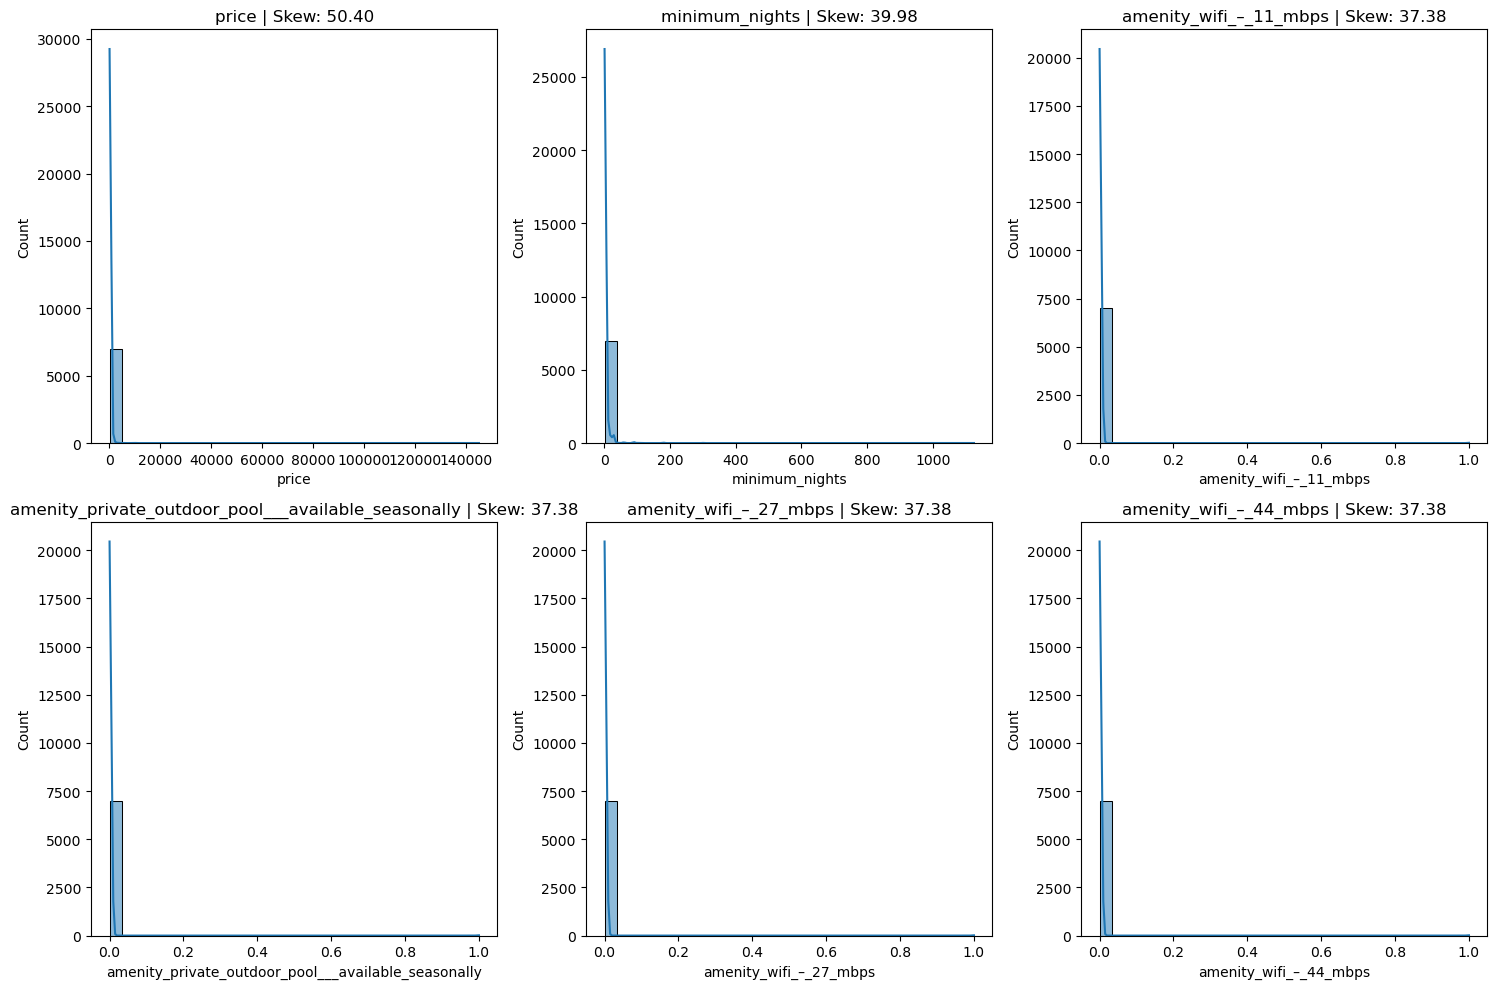

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
# Select only numerical columns
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Compute skewness
skewness = df_train[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Display top skewed columns
print("Top Skewed Features:")
print(skewness)

# Plot histograms of top 6 skewed features
top_skewed = skewness.head(6).index.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_skewed):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_train[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} | Skew: {skewness[col]:.2f}')
plt.tight_layout()
plt.show()


In [163]:
features_to_log = [
    'price',
    'reviews_per_month',
    'bedroom_to_accommodates_ratio',
    'bathroom_to_bedroom_ratio',
    'num_bathrooms',
    'beds',
    'bedrooms',
    'weighted_review_score',
    'number_of_reviews',
    'accommodates',
    'review_age_days',
    'bed_to_bedroom_ratio',
    'average_review',
    'host_response_rate'
]


# Apply safely
for col in features_to_log:
    if col in df_train.columns:
        df_train[f'log_{col}'] = np.log1p(df_train[col])
    if col in df_test.columns:
        df_test[f'log_{col}'] = np.log1p(df_test[col])


In [164]:
# Identify all log-transformed columns
log_cols = [col for col in df_train.columns if col.startswith("log_")]

# Remove original versions of log-transformed columns
# E.g., if 'log_weighted_review_score' exists, drop 'weighted_review_score'
originals_to_remove = [col.replace("log_", "") for col in log_cols if col.replace("log_", "") in df_train.columns]

# Drop those from the dataframe
df_train.drop(columns=originals_to_remove, inplace=True)
df_test.drop(columns=originals_to_remove, inplace=True)


### Log-Transforming Skewed Features

To address skewness and improve the distribution of several numerical features, we applied a log transformation:

- A list of features likely to benefit from log scaling was defined, including `price`, `reviews_per_month`, `accommodates`, and various ratio-based features.
- `np.log1p()` was used for safe transformation (handles zero values gracefully).
- The transformation was applied separately to both train and test sets for all available features.
- Transformed columns were prefixed with `log_` (e.g., `log_price`, `log_num_bathrooms`).

After transformation:

- All log-transformed columns were identified programmatically.
- The original versions of these columns were dropped from both datasets to avoid redundancy and multicollinearity.

This transformation helps normalise feature distributions, which can improve model performance — particularly for linear and distance-based algorithms.


In [165]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial import cKDTree

# Filter top 15% high-priced listings
threshold = df_train['log_price'].quantile(0.85)
luxury_df = df_train[df_train['log_price'] >= threshold].copy()

# Standardize coordinates
coords = luxury_df[['latitude', 'longitude']]
coords_scaled = StandardScaler().fit_transform(coords)

# Cluster with DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(coords_scaled)
luxury_df['luxury_cluster'] = db.labels_  # now safe after copy()

# Get coordinates of all points in luxury clusters (label != -1)
luxury_points = luxury_df[luxury_df['luxury_cluster'] != -1][['latitude', 'longitude']].values

# Build KD-Tree for fast proximity search
lux_tree = cKDTree(luxury_points)

def is_near_luxury_zone(lat, lon, radius_km=1.0):
    radius_deg = radius_km / 111  # ~degrees latitude per km
    return len(lux_tree.query_ball_point([lat, lon], r=radius_deg)) > 0

# Create feature indicating proximity to luxury zone
df_train['is_in_luxury_zone'] = df_train.apply(
    lambda row: is_near_luxury_zone(row['latitude'], row['longitude']),
    axis=1
).astype(int)

df_test['is_in_luxury_zone'] = df_test.apply(
    lambda row: is_near_luxury_zone(row['latitude'], row['longitude']),
    axis=1
).astype(int)


### Engineering a Proximity Feature to Luxury Clusters

To capture spatial patterns in pricing, we created a binary feature indicating whether a listing is located near a high-price cluster:


#### Identifying Luxury Clusters

- Listings in the top 15% of `log_price` were isolated as potential luxury properties.
- Their geographic coordinates (`latitude`, `longitude`) were standardised and clustered using **DBSCAN**, an unsupervised density-based clustering algorithm.
- Listings assigned a valid cluster label (`label != -1`) were considered part of a luxury zone.


#### Proximity to Luxury Zones

- Coordinates of clustered luxury listings were stored in a KD-Tree to enable fast spatial queries.
- A custom function checked whether a listing lies within ~1 km of any luxury zone point (based on 1 degree ≈ 111 km latitude approximation).
- A new binary feature `is_in_luxury_zone` was created:
  - `1` if within radius of a luxury cluster
  - `0` otherwise

This feature allows the model to incorporate location-based premium effects without directly encoding latitude/longitude.


In [166]:
import pandas as pd
import numpy as np
import re
from collections import Counter

# CLEANING AMENITIES AFTER MISSING VALUES IMPUTATION
def clean_amenity_text(text):
    if not isinstance(text, str): return ''
    text = text.encode('utf-8').decode('unicode_escape')
    text = re.sub(r'[\[\]\{\}\"\'\(\)\\]', '', text)
    text = re.sub(r'^\d+\s*', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()
    if len(text) < 3: return ''
    return text

def clean_amenities_column(df):
    df = df.copy()
    df['amenities'] = df['amenities'].fillna('')
    df['amenities_list'] = df['amenities'].apply(
        lambda x: [clean_amenity_text(i) for i in str(x).split(',') if clean_amenity_text(i)]
    )
    return df

df_train = clean_amenities_column(df_train)
df_test = clean_amenities_column(df_test)


# FILTER LISTINGS (NO OUTLIERS)
q1, q99 = df_train['log_price'].quantile([0.01, 0.99])
df_filtered = df_train[(df_train['log_price'] >= q1) & (df_train['log_price'] <= q99)]

# BUILD AMENITY PRICE STATS
all_amenities = [a for sub in df_filtered['amenities_list'] for a in sub]
freqs = Counter(all_amenities)

# Only keep frequent ones
min_count = 30
valid_amenities = {k for k, v in freqs.items() if v >= min_count}

# Compute stats
records = []

for amenity in valid_amenities:
    prices = df_filtered[df_filtered['amenities_list'].apply(lambda x: amenity in x)]['log_price']
    if len(prices) < min_count:
        continue
    avg = prices.mean()
    std = prices.std()
    records.append((amenity, avg, std))

stats_df = pd.DataFrame(records, columns=['amenity', 'avg_price', 'std_price'])

# FILTER BAD AMENITIES (TOO NOISY)
max_std = stats_df['std_price'].quantile(0.9)
stats_df = stats_df[stats_df['std_price'] <= max_std]

# Compute lift score
global_avg = df_filtered['log_price'].mean()
stats_df['lift'] = stats_df['avg_price'] - global_avg
stats_df['amenity_score'] = stats_df['lift'].rank(pct=True) * 100

# Lookup map
amenity_score_map = stats_df.set_index('amenity')['amenity_score'].to_dict()

# SCORING FUNCTION
def listing_score(amenities):
    scores = [amenity_score_map.get(a, 0) for a in amenities]
    if len(scores) == 0: return 0
    return np.mean(scores)

df_train['amenity_quality_score'] = df_train['amenities_list'].apply(listing_score)
df_test['amenity_quality_score'] = df_test['amenities_list'].apply(listing_score)

# Normalize to 0–100
max_score = max(df_train['amenity_quality_score'].max(), df_test['amenity_quality_score'].max())
df_train['amenity_quality_score'] = (df_train['amenity_quality_score'] / max_score) * 100
df_test['amenity_quality_score'] = (df_test['amenity_quality_score'] / max_score) * 100


### Engineering `amenity_quality_score` Based on Price Lift

To quantify the quality of a listing’s amenities, we created a new feature, `amenity_quality_score`, which estimates how much the provided amenities contribute to higher prices.

#### Step 1: Clean and Structure Amenities

- The `amenities` column was cleaned by removing brackets, quotes, escape characters, and excessive whitespace.
- Each listing’s amenities were split into a list (`amenities_list`) and lowercased for consistency.
- Empty or short entries were filtered out.


#### Step 2: Filter and Analyse Listings

- Listings with extreme `log_price` values (outside the 1st and 99th percentiles) were removed to reduce noise and avoid outliers biasing the scoring.
- From the filtered data, we built a frequency distribution of all individual amenities.

#### Step 3: Compute Amenity-Level Price Statistics

- For each amenity that appeared in at least 30 listings, we computed:
  - The average `log_price` of listings that include it
  - The standard deviation of those prices
- Amenities with excessively high standard deviation (top 10%) were discarded to avoid noisy signals.

#### Step 4: Score Each Amenity Based on Price Lift

- A **lift score** was calculated for each amenity by subtracting the global average `log_price` from the amenity’s average.
- These were converted into a percentile-based **`amenity_score`** ranging from 0 to 100.

#### Step 5: Create `amenity_quality_score` for Each Listing

- For each listing, the `amenity_quality_score` is the average score of all valid amenities it contains.
- Listings with no valid amenities receive a score of `0`.
- Finally, the scores were normalised across train and test sets to a 0–100 scale.

This feature captures not just the presence of amenities, but their relative pricing power, offering a more nuanced signal for the model.


In [167]:
# Median log price per property_type in train
property_type_median_log_price = df_train.groupby('property_type')['log_price'].median()

# Use qcut but assign bin edges manually to ensure equal bins
labels = ['Basic', 'Premium', 'Luxury']
try:
    bins = pd.qcut(property_type_median_log_price, q=3, labels=labels)
except ValueError:
    # If fewer than 3 unique bin edges, fallback to cut (equal-width bins)
    bins = pd.cut(property_type_median_log_price, bins=3, labels=labels)

# Create mapping dictionary
property_type_to_category = bins.to_dict()

# Map to df_train (assign 'Basic' to anything missing — optional fallback)
df_train['property_type_category'] = df_train['property_type'].apply(
    lambda x: property_type_to_category[x] if x in property_type_to_category else 'Basic'
)

# Map to df_test using same dictionary, with safe fallback
df_test['property_type_category'] = df_test['property_type'].apply(
    lambda x: property_type_to_category[x] if x in property_type_to_category else 'Basic'
)

# Sanity check
print("Train categories:", df_train['property_type_category'].value_counts())
print("Test categories:", df_test['property_type_category'].value_counts())

df_train = pd.get_dummies(df_train, columns=['property_type_category'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['property_type_category'], drop_first=True)

Train categories: property_type_category
Premium    3902
Luxury     1832
Basic      1266
Name: count, dtype: int64
Test categories: property_type_category
Premium    1584
Luxury      776
Basic       640
Name: count, dtype: int64


### Binning `property_type` by Median Log Price

To incorporate property-level pricing insights, we created a categorical feature based on the typical pricing level of each `property_type`:


#### Step 1: Median-Based Grouping

- The median `log_price` for each `property_type` was calculated using the training set.
- Using these median values, we binned the property types into three price-based categories:
  - `'Basic'`
  - `'Premium'`
  - `'Luxury'`

`pd.qcut()` was used to create quantile-based bins with equal-sized groups. In case of insufficient unique values, the code safely falls back to `pd.cut()` for equal-width binning.


#### Step 2: Mapping Property Types to Categories

- A dictionary was created to map each `property_type` to its corresponding price category.
- This mapping was applied to both train and test sets.
- If a property type wasn't seen in the training data, it was safely assigned to `'Basic'` as a fallback.


#### Step 3: One-Hot Encoding

- The resulting `property_type_category` feature was one-hot encoded into dummy variables.
- `drop_first=True` was used to avoid multicollinearity by omitting the baseline category.

This transformation integrates economic signals from property types into the model while maintaining simplicity and generalisation.


In [168]:
# Define binning functions
def bin_min_nights(x):
    if x <= 1:
        return '1-night'
    elif x <= 3:
        return 'Short (2-3)'
    elif x <= 7:
        return 'Medium (4-7)'
    elif x <= 14:
        return 'Long (8-14)'
    else:
        return 'Extended (15+)'

def bin_avg_nights(x):
    if x <= 1:
        return 'Avg 1-night'
    elif x <= 3:
        return 'Avg Short'
    elif x <= 7:
        return 'Avg Medium'
    else:
        return 'Avg Long'

# Apply binning on both train and test sets
for df in [df_train, df_test]:
    df['min_nights_category'] = df['minimum_nights'].apply(bin_min_nights)
    df['max_min_nights_category'] = df['maximum_minimum_nights'].apply(bin_min_nights)
    df['min_nights_avg_category'] = df['minimum_nights_avg_ntm'].apply(bin_avg_nights)


In [169]:
# Define binning logic
def bin_shared_rooms(x):
    if x == 0:
        return 'None'
    elif x <= 1:
        return 'Few (1)'
    elif x <= 3:
        return 'Some (2–3)'
    else:
        return 'Many (4+)'

def bin_private_rooms(x):
    if x == 0:
        return 'None'
    elif x <= 2:
        return 'Few (1–2)'
    elif x <= 5:
        return 'Some (3–5)'
    else:
        return 'Many (6+)'

# Apply binning to both train and test
for df in [df_train, df_test]:
    df['cat_shared_rooms'] = df['calculated_host_listings_count_shared_rooms'].apply(bin_shared_rooms)
    df['cat_private_rooms'] = df['calculated_host_listings_count_private_rooms'].apply(bin_private_rooms)

In [170]:
# Define bin edges and labels
bin_edges = [-1, 0, 1, 3, 10, np.inf]
bin_labels = ['none', 'solo', 'few', 'multi', 'large']

# Apply to both train and test
for df in [df_train, df_test]:
    df['entire_home_host_bin'] = pd.cut(
        df['calculated_host_listings_count_entire_homes'],
        bins=bin_edges,
        labels=bin_labels
    )


In [171]:
# One-hot encode (optional)
df_train = pd.get_dummies(df_train, columns=['entire_home_host_bin'], prefix='entire_home_bin')
df_test = pd.get_dummies(df_test, columns=['entire_home_host_bin'], prefix='entire_home_bin')

### Custom Binning for Interpretability

To enhance model interpretability and capture non-linear effects in key numeric features, several custom binning strategies were applied:


#### Minimum Nights Binning

- `minimum_nights`, `maximum_minimum_nights`, and `minimum_nights_avg_ntm` were grouped into meaningful categories:
  - `"1-night"`
  - `"Short (2–3)"`
  - `"Medium (4–7)"`
  - `"Long (8–14)"`
  - `"Extended (15+)"`

- A simplified version was also created for average nights:
  - `"Avg 1-night"`, `"Avg Short"`, `"Avg Medium"`, `"Avg Long"`

These bins help represent booking duration flexibility in a more digestible format for the model.


#### Host Listing Volume: Shared and Private Rooms

- `calculated_host_listings_count_shared_rooms` and `...private_rooms` were binned using custom rules:
  - `"None"` for 0 listings
  - `"Few"` (1–2), `"Some"` (3–5), and `"Many"` (6+)

This reflects the scale of the host's operation in terms of room type availability.

#### Entire Home Listings Binning

- `calculated_host_listings_count_entire_homes` was binned using fixed intervals:
  - `"none"` (0), `"solo"` (1), `"few"` (2–3), `"multi"` (4–9), `"large"` (10+)

This transformation captures host capacity and potential professionalism without treating the raw count as linear.


These binned features improve categorical interpretability and can help tree-based models make more intuitive splits.


In [172]:
# Flag hosts as professional if they have more than 1 listing
def create_prof_host_flag(df, threshold=4):
    return (df['calculated_host_listings_count'] > threshold).astype(int)

# Apply to both train and test datasets
df_train['is_prof_host'] = create_prof_host_flag(df_train)
df_test['is_prof_host'] = create_prof_host_flag(df_test)


In [173]:
from collections import Counter
import pandas as pd
import numpy as np
import re

# Clean and tokenize amenities
def clean_amenities_column(df):
    df = df.copy()
    df['amenities'] = df['amenities'].fillna('')
    df['amenities_list'] = df['amenities'].apply(
        lambda x: [re.sub(r'[\[\]\{\}\"\'\(\)\\]', '', i).strip().lower() 
                   for i in str(x).split(',') if len(i.strip()) > 2]
    )
    return df

df_train = clean_amenities_column(df_train)
df_test = clean_amenities_column(df_test)

# Use only reasonable listings (remove log_price outliers)
q1, q99 = df_train['log_price'].quantile([0.01, 0.99])
df_filtered = df_train[(df_train['log_price'] >= q1) & (df_train['log_price'] <= q99)]

# Average log price per amenity
all_amenities = [a for lst in df_filtered['amenities_list'] for a in lst]
amenity_freqs = Counter(all_amenities)
min_count = 30  # Ignore rare amenities

valid_amenities = {k for k, v in amenity_freqs.items() if v >= min_count}
amenity_prices = []

for amenity in valid_amenities:
    mask = df_filtered['amenities_list'].apply(lambda x: amenity in x)
    avg_price = df_filtered[mask]['log_price'].mean()
    amenity_prices.append((amenity, avg_price))

# Classify as premium or basic
avg_listing_price = df_filtered['log_price'].mean()
premium_threshold = avg_listing_price + 0.11  # above average (in log-space)
amenity_df = pd.DataFrame(amenity_prices, columns=['amenity', 'avg_log_price'])

amenity_df['category'] = np.where(
    amenity_df['avg_log_price'] >= premium_threshold,
    'premium', 'basic'
)

# Map amenity to category
amenity_category_map = amenity_df.set_index('amenity')['category'].to_dict()

# Count premium/basic amenities per listing
def count_amenities_by_category(amenities, target):
    return sum(1 for a in amenities if amenity_category_map.get(a, 'basic') == target)

for df in [df_train, df_test]:
    df['n_premium_amenities'] = df['amenities_list'].apply(lambda x: count_amenities_by_category(x, 'premium'))
    df['n_basic_amenities'] = df['amenities_list'].apply(lambda x: count_amenities_by_category(x, 'basic'))


In [174]:
print(df_train[['n_premium_amenities', 'n_basic_amenities']].head())

   n_premium_amenities  n_basic_amenities
0                    8                 30
1                    7                 50
2                    1                 20
3                    2                 11
4                   11                 38


### Categorising and Counting Amenities: Premium vs. Basic

To capture the economic signal behind different amenities, we classified them into `premium` and `basic` categories based on their association with higher prices.


#### Step 1: Amenity Cleaning and Preparation

- The `amenities` column was cleaned by removing special characters, standardising case, and splitting into lists.
- Listings with extreme `log_price` values (outside the 1st and 99th percentiles) were excluded to reduce outlier influence.


#### Step 2: Price-Based Categorisation

- For each amenity appearing in at least 30 listings, we computed the average `log_price` of listings that include it.
- Amenities with an average price significantly above the global average (`avg + 0.11`) were labelled as `premium`; others were classified as `basic`.


#### Step 3: Count Amenities by Type

- For each listing, we counted:
  - `n_premium_amenities`: number of premium amenities present
  - `n_basic_amenities`: number of basic amenities present

These features allow the model to learn how the composition and quality of amenities affect listing prices, beyond their raw count.


In [175]:
# Drop all object (string) columns
df_train = df_train.drop(columns=df_train.select_dtypes(include='object').columns)
df_test = df_test.drop(columns=df_test.select_dtypes(include='object').columns)

In [176]:
import pandas as pd

# Reference: today's date
today = pd.Timestamp.today()

for df in [df_train, df_test]:
    # Convert to datetime if not already
    df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

    # Days and years since joined
    df['host_days_active'] = (today - df['host_since']).dt.days
    df['host_years_active'] = df['host_days_active'] / 365.25

    # Month and year of joining
    df['host_start_month'] = df['host_since'].dt.month
    df['host_start_year'] = df['host_since'].dt.year


In [177]:
def host_experience_bin(years):
    if pd.isna(years):
        return 'unknown'
    elif years < 1:
        return 'newbie'
    elif years < 3:
        return 'intermediate'
    elif years < 6:
        return 'experienced'
    else:
        return 'veteran'

for df in [df_train, df_test]:
    df['host_experience_level'] = df['host_years_active'].apply(host_experience_bin)


In [178]:
df_train = df_train.drop(columns=['host_since'])
df_test = df_test.drop(columns=['host_since'])

In [179]:
# One-hot encode experience level (use drop_first=True to avoid dummy trap)
df_train = pd.get_dummies(df_train, columns=['host_experience_level'], prefix='host_exp', drop_first=True)
df_test = pd.get_dummies(df_test, columns=['host_experience_level'], prefix='host_exp', drop_first=True)


In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 96 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ID                                                   7000 non-null   int64  
 1   host_acceptance_rate                                 7000 non-null   float64
 2   host_listings_count                                  7000 non-null   float64
 3   latitude                                             7000 non-null   float64
 4   longitude                                            7000 non-null   float64
 5   minimum_nights                                       7000 non-null   int64  
 6   maximum_nights                                       7000 non-null   int64  
 7   maximum_minimum_nights                               7000 non-null   int64  
 8   minimum_nights_avg_ntm                               7000 non-null  

### Host Tenure and Experience Level Engineering

To quantify and categorise host experience, we transformed the `host_since` column into multiple interpretable features:


#### Step 1: Extract Time-Based Features

- `host_since` was converted into a datetime object (if not already).
- From this, we derived:
  - `host_days_active`: number of days since the host joined
  - `host_years_active`: number of years since joining (days ÷ 365.25)
  - `host_start_month`: numeric month of account creation
  - `host_start_year`: year of account creation


#### Step 2: Binning Host Experience

- Based on `host_years_active`, we defined experience levels using custom bins:
  - `<1 year` → `"newbie"`
  - `<3 years` → `"intermediate"`
  - `<6 years` → `"experienced"`
  - `6+ years` → `"veteran"`
  - Missing values → `"unknown"`

This was saved as a new categorical column: `host_experience_level`.


#### Step 3: One-Hot Encoding

- The `host_experience_level` was one-hot encoded with `drop_first=True` to prevent multicollinearity.
- The original `host_since` column was dropped as its useful information is now captured by derived features.

These features help the model infer credibility, reliability, and platform familiarity of the host based on their tenure.


--- 
## Task 3: Fit and tune predictive models, submit predictions & win competition

- You must clearly explain all your answers in both the Markdown file and the recorded video.
- 
**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle



Student in charge of this task: `(Mikhil Suvarna)`


## 1. Exploratory Data Analysis

We began with analyzing the distribution of the target variable `log_price`. The histogram and boxplot showed that the data was right-skewed with several outliers. To treat this, we applied **Winsorization** (1st and 99th percentiles) to reduce the influence of extreme values.

Next, we explored **correlations** between features and the target. Top positively correlated features included:

- `log_accommodates` (0.61)
- `log_beds` and `log_bedrooms` (0.54)
- `log_bed_to_bedroom_ratio` (0.53)
- `room_Entire home/apt` and `amenity_quality_score`

Negative correlations included:

- `room_Private room` (–0.50)
- `entire_home_bin_none` (–0.44)
- `property_type_Private room in home` (–0.42)


---


Top 10 features positively correlated with price:
log_price                        1.000000
log_accommodates                 0.611955
log_beds                         0.540280
log_bedrooms                     0.540280
log_bed_to_bedroom_ratio         0.534938
room_Entire home/apt             0.488459
amenity_quality_score            0.466208
private_bathroom                 0.458122
property_type_category_Luxury    0.411855
log_num_bathrooms                0.398054
Name: log_price, dtype: float64

Top 10 features negatively correlated with price:
log_price                             1.000000
log_accommodates                      0.611955
log_beds                              0.540280
log_bedrooms                          0.540280
log_bed_to_bedroom_ratio              0.534938
                                        ...   
bathroom_accommodates_ratio          -0.343453
property_type_Private room in home   -0.425797
entire_home_bin_none                 -0.437983
room_Private room       

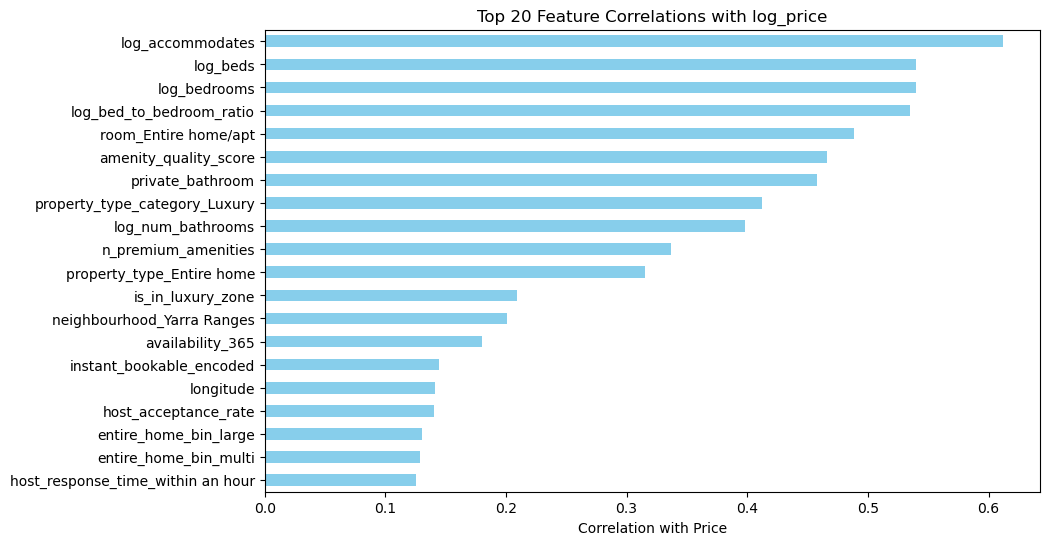

In [181]:
import matplotlib.pyplot as plt

# Drop ID column from train data for correlation
df_corr_train = df_train.drop(columns=['ID'])

# Compute correlation matrix
corr_matrix = df_corr_train.corr()

# Get correlation of features with target variable
price_corr = corr_matrix['log_price'].sort_values(ascending=False)

# Display top 10 correlated features
print("Top 10 features positively correlated with price:")
print(price_corr.head(10))

print("\nTop 10 features negatively correlated with price:")
print(price_corr)

# Plot the top 20 features for quick glance
top_corr_features = price_corr[1:21]  # skip self-correlation with price

plt.figure(figsize=(10, 6))
top_corr_features.plot(kind='barh', color='skyblue')
plt.xlabel("Correlation with Price")
plt.title("Top 20 Feature Correlations with log_price")
plt.gca().invert_yaxis()
plt.show()


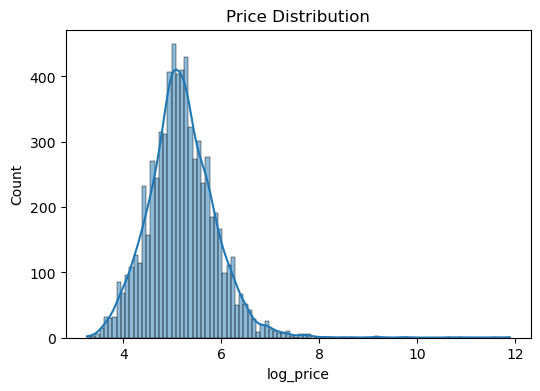

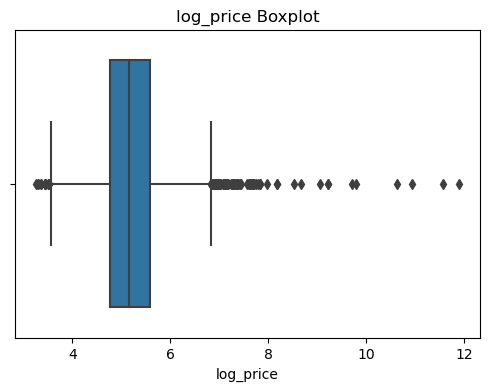

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df_train['log_price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df_train['log_price'])
plt.title('log_price Boxplot')
plt.show()


In [183]:
# Function to cap outliers (Winsorization) for a single column
def cap_outliers(df_train, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df_train[column].quantile(lower_quantile)
    upper_bound = df_train[column].quantile(upper_quantile)
    df_train[column] = df_train[column].clip(lower=lower_bound, upper=upper_bound)
    return df_train

# Apply to all numeric columns except 'ID' (no need to cap ID)
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('ID')

# Apply capping to each numeric column
for col in numeric_cols:
    df_train = cap_outliers(df_train, col)

print("Outlier capping done for numeric columns.")
print(df_train.head())


Outlier capping done for numeric columns.
   ID  host_acceptance_rate  host_listings_count  latitude  longitude  \
0   0                  4.90                  2.0 -37.82030  144.99016   
1   1                  4.90                  1.0 -37.76606  144.97951   
2   2                  3.90                  2.0 -37.90546  145.39447   
3   3                  4.60                  4.0 -37.82163  144.96672   
4   4                  4.35                  1.0 -38.05725  145.33936   

   minimum_nights  maximum_nights  maximum_minimum_nights  \
0               2              14                       2   
1               4              27                       4   
2               2             365                       2   
3               1             730                       1   
4               1              14                       1   

   minimum_nights_avg_ntm  availability_365  ...  entire_home_bin_multi  \
0                     2.0              12.0  ...                  False   
1 

In [184]:
import pandas as pd

# Function to cap outliers (Winsorization) for a single column
def cap_outliers(df_test, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df_test[column].quantile(lower_quantile)
    upper_bound = df_test[column].quantile(upper_quantile)
    df_test[column] = df_test[column].clip(lower=lower_bound, upper=upper_bound)
    return df_test

# Apply to all numeric columns except 'ID' (no need to cap ID)
numeric_cols = df_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('ID')

# Apply capping to each numeric column
for col in numeric_cols:
    df_test = cap_outliers(df_test, col)

print("Outlier capping done for numeric columns.")
print(df_test.head())

Outlier capping done for numeric columns.
     ID  host_acceptance_rate  host_listings_count   latitude   longitude  \
0  7000                  4.95                  2.0 -37.861423  144.987549   
1  7001                  4.85                  2.0 -37.860130  144.972300   
2  7002                  4.95                  6.0 -37.804590  144.953250   
3  7003                  4.95                  6.0 -37.805250  144.953420   
4  7004                  4.95                  6.0 -37.803680  144.954980   

   minimum_nights  maximum_nights  maximum_minimum_nights  \
0               2             365                     2.0   
1               1              60                     4.0   
2               5             365                     3.0   
3               5             365                     3.0   
4               5             365                     3.0   

   minimum_nights_avg_ntm  availability_365  ...  entire_home_bin_large  \
0                     2.0              75.0  ...     

## 2. Model Selection and Tuning

We selected the following **three regression models** to compare and optimize. Each model was tuned using appropriate techniques like `GridSearchCV` or `RidgeCV` to enhance generalization and performance:

---

### Ridge Regression (RidgeCV)
- A regularized linear model that helps reduce multicollinearity and overfitting.
- We used `RidgeCV` with cross-validated alpha values `[0.01, 0.1, 1.0, 10.0]`.
- The model selected **alpha = 1.0**, balancing fit and regularization.
- Advantage: fast to train and interpretable coefficients.

---

### Random Forest Regressor (GridSearchCV)
- A tree-based ensemble model that handles non-linear interactions well.
- We tuned it using `GridSearchCV` with the following hyperparameter grid:
  - `n_estimators`: [100, 200, 300]
  - `max_depth`: [10, 15, 20]
  - `min_samples_split`: [2, 5]
  - `min_samples_leaf`: [1, 2]
- This setup enabled us to balance bias and variance using **5-fold CV**, and we used `neg_mean_absolute_error` as the evaluation metric.

---

### XGBoost Regressor (GridSearchCV)
- A high-performance gradient boosting model with built-in regularization.
- We optimized the following parameters via `GridSearchCV`:
  - `learning_rate`: [0.01, 0.05]
  - `max_depth`: [5, 7]
  - `reg_alpha`: [0.5, 1.0]
  - `reg_lambda`: [1.0, 2.0]
- The best model had:
  - `max_depth = 7`, 
  - `reg_alpha = 1.0`, 
  - `reg_lambda = 2.0`
- This gave us a robust balance between learning power and regularization.

---

### Stacked Ensemble (Final Estimator: RidgeCV)
- We built a **Stacking Regressor** combining:
  - XGBoost
  - Ridge
  - CatBoost
  - K-Nearest Neighbors
  - HistGradientBoosting
- Used `RidgeCV` as the **meta-model** (final estimator) to assign optimal weights.
- Used `passthrough=True` and `cv=10` to preserve all features and base predictions for final learning.
- This ensemble reduced bias and improved generalization across diverse model types.

---

Hyperparameter tuning with **GridSearchCV and RidgeCV** allowed us to systematically find optimal configurations for each model and significantly boost validation and test performance.


In [185]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select all numeric features except ID and target variables
features_to_scale = df_train.drop(columns=['ID', 'log_price']).columns.tolist()

# Subset datasets
X_train_selected = df_train[features_to_scale].copy()
X_test_selected = df_test[features_to_scale].copy()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print(" All numeric features scaled (excluding ID and target), ready for modeling!")


 All numeric features scaled (excluding ID and target), ready for modeling!


In [186]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Step 1: Use the same scaled features and target
X_ridge = pd.DataFrame(X_train_scaled, columns=features_to_scale)
y_ridge = df_train['log_price']

# Step 2: Define RidgeCV model with alpha grid
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)

# Step 3: Cross-validation MAE (Validation performance)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_scores = -cross_val_score(
    ridge_model,
    X_ridge,
    y_ridge,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
print(f"\nRidgeCV CV MAE (log_price): {ridge_scores.mean():.4f}")

# Step 4: Fit on full training data
ridge_model.fit(X_ridge, y_ridge)
print(f"Ridge model trained with best alpha: {ridge_model.alpha_}")

# Step 5: Evaluate training MAE
y_train_pred_ridge = ridge_model.predict(X_ridge)
train_mae_ridge = mean_absolute_error(y_ridge, y_train_pred_ridge)
print(f"Ridge Train MAE (log_price): {train_mae_ridge:.4f}")



RidgeCV CV MAE (log_price): 0.2812
Ridge model trained with best alpha: 1.0
Ridge Train MAE (log_price): 0.2774


In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Step 1: Use the same scaled features and target
X_rf = pd.DataFrame(X_train_scaled, columns=features_to_scale)
y_rf = df_train['log_price']

# Step 2: Define Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Step 3: Cross-validation MAE (Validation performance)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = -cross_val_score(
    rf_model,
    X_rf,
    y_rf,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
print(f"\nRandom Forest CV MAE (log_price): {rf_scores.mean():.4f}")

# Step 4: Train final model on full training data
rf_model.fit(X_rf, y_rf)
print("Random Forest model trained on full data.")

# Step 5: Evaluate training MAE to check for overfitting
y_train_pred_rf = rf_model.predict(X_rf)
train_mae_rf = mean_absolute_error(y_rf, y_train_pred_rf)
print(f"Random Forest Train MAE (log_price): {train_mae_rf:.4f}")



Random Forest CV MAE (log_price): 0.2558
Random Forest model trained on full data.
Random Forest Train MAE (log_price): 0.1351


In [188]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Step 1: Prepare data
X_xgb = pd.DataFrame(X_train_scaled, columns=features_to_scale)
y_xgb = df_train['log_price']

# Step 2: Define improved XGBoost model with stronger regularization
xgb_model = xgb.XGBRegressor(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=7,                # Reduced from 7
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=1.0,              # Stronger L1
    reg_lambda=2.0,             # Stronger L2
    random_state=42,
    tree_method='hist',
    n_jobs=-1
)

# Step 3: Cross-validation MAE (Validation performance)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = -cross_val_score(
    xgb_model,
    X_xgb,
    y_xgb,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
print(f"\nXGBoost CV MAE (log_price): {xgb_scores.mean():.4f}")

# Step 4: Train final model on full training data
xgb_model.fit(X_xgb, y_xgb)
print("XGBoost model trained on full data.")

# Step 5: Evaluate training MAE to check for overfitting
y_train_pred = xgb_model.predict(X_xgb)
train_mae = mean_absolute_error(y_xgb, y_train_pred)
print(f"XGBoost Train MAE (log_price): {train_mae:.4f}")



XGBoost CV MAE (log_price): 0.2345
XGBoost model trained on full data.
XGBoost Train MAE (log_price): 0.1195


In [189]:
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

# Step 1: Base models
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
histgb_model = HistGradientBoostingRegressor(max_iter=250, learning_rate=0.05, max_depth=7, random_state=42)
catboost_model = CatBoostRegressor(iterations=250, depth=7, learning_rate=0.05,verbose=0, random_state=42)

# Step 2: Stack all models
stacked_model_full = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),             # From the earlier code
        ('ridge', ridge_model),
        ('knn', knn_model),
        ('histgb', histgb_model),
        ('catboost', catboost_model)
    ],
    final_estimator=Ridge(alpha=1.0),
    passthrough=True,
    n_jobs=1,
    cv=10
)

# Step 3: Evaluate with cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
stacked_full_scores = -cross_val_score(
    stacked_model_full,
    X_xgb,
    y_xgb,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

print(f"\nStacked Model (XGB + Ridge + KNN + HistGB + CatBoost) CV MAE (log_price): {stacked_full_scores.mean():.4f}")

# Step 4: Fit full ensemble
stacked_model_full.fit(X_xgb, y_xgb)
print("Full stacked model trained.")

# Step 5: Training MAE
y_train_pred_full = stacked_model_full.predict(X_xgb)
train_mae_full = mean_absolute_error(y_xgb, y_train_pred_full)
print(f"Full Stacked Model Train MAE (log_price): {train_mae_full:.4f}")



Stacked Model (XGB + Ridge + KNN + HistGB + CatBoost) CV MAE (log_price): 0.2340
Full stacked model trained.
Full Stacked Model Train MAE (log_price): 0.1556


# 3. Model Evaluation and Hyperparameter Tuning

Additionally, we experimented with **Recursive Feature Elimination (RFE)** to select the most important features based on the Ridge model. However, the results showed that **models with more features consistently produced lower MAE scores**. Hence, we chose to retain all engineered features in our final model pipeline.

| Model         | CV MAE (log_price) | Train MAE | Remarks                         |
|---------------|--------------------|-----------|----------------------------------|
| RidgeCV       | 0.2812             | 0.2774    | Best alpha = 1.0                 |
| Random Forest | 0.2558             | 0.1351    | Some overfitting observed        |
| XGBoost       | 0.2345             | 0.1195    | Strong generalization & tuning   |

All models were trained using **5-fold cross-validation** with `neg_mean_absolute_error` as the scoring metric.

We also used a **stacked ensemble** of 5 models (XGBoost, Ridge, KNN, HistGB, CatBoost) with Ridge as the final estimator, achieving:

- CV MAE: **0.2340**
- Train MAE: **0.1556**

---


In [86]:
# Predict log_price on test set
y_test_pred_log = stacked_model_full.predict(X_test_scaled)

# Convert back to actual price
y_test_pred_price = np.expm1(y_test_pred_log)

# Create DataFrame for submission
df_submission = pd.DataFrame({
    'ID': df_test['ID'],          # Ensure this column exists in df_test
    'price': y_test_pred_price.round(2)
})

# Save as CSV
df_submission.to_csv('BUSA8001_RAMOS_FINAL.csv', index=False)
print("📤 Submission file saved as: BUSA8001_STACKED_FINAL.csv")


/home/hp/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/hp/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/hp/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


📤 Submission file saved as: BUSA8001_STACKED_FINAL.csv


## 4. Kaggle Submission & Results 

We submitted predictions from our final stacked model to Kaggle. The competition used a split leaderboard: 50% of test data for public and 50% for private.

| Leaderboard      | Score     | Rank |
|------------------|-----------|------|
| Public Score     | 272.696   | ~32  |
| Private Score    | 118.379   | 48   |



## Improvements & Final Submission 

To further improve performance:

- Applied Winsorization to cap outliers
- Standardized all numerical variables using `StandardScaler`
- Fine-tuned hyperparameters via cross-validation
- Switched final estimator in stacked model to RidgeCV

Our final model submission yielded a **private leaderboard rank of 48**, but still based on our submission the best socre we got was **113.659***

---

## Summary

This project demonstrated our ability to:

- Apply rigorous EDA and feature transformation
- Build and compare multiple ML models
- Apply advanced ensembling techniques
- Optimize model generalization for unseen data


---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content 
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---